In [ ]:
#REFERENCE
#Exploration & Transforming Images in Python by MuonNeutrino in Kaggle
#clean_training_data.py by Katymn on github

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_json("train.json")
print ("Training data shape: ", df.shape, "\nColumns: ", df.columns, "\n")
df.head()

Training data shape:  (1604, 5) 
Columns:  Index(['id', 'band_1', 'band_2', 'inc_angle', 'is_iceberg'], dtype='object') 



id                                             band_1  \
0  dfd5f913  [-27.878360999999998, -27.15416, -28.668615, -...   
1  e25388fd  [-12.242375, -14.920304999999999, -14.920363, ...   
2  58b2aaa0  [-24.603676, -24.603714, -24.871029, -23.15277...   
3  4cfc3a18  [-22.454607, -23.082819, -23.998013, -23.99805...   
4  271f93f4  [-26.006956, -23.164886, -23.164886, -26.89116...   

                                              band_2 inc_angle  is_iceberg  
0  [-27.154118, -29.537888, -31.0306, -32.190483,...   43.9239           0  
1  [-31.506321, -27.984554, -26.645678, -23.76760...   38.1562           0  
2  [-24.870956, -24.092632, -20.653963, -19.41104...   45.2859           1  
3  [-27.889421, -27.519794, -27.165262, -29.10350...   43.8306           0  
4  [-27.206915, -30.259186, -30.259186, -23.16495...   35.6256           0

In [ ]:
df= df.replace("na", np.nan)

/tmp/ipython-input-2985322484.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df= df.replace("na", np.nan)


In [ ]:
df.isnull().sum()

id              0
band_1          0
band_2          0
inc_angle     133
is_iceberg      0
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()


id            0
band_1        0
band_2        0
inc_angle     0
is_iceberg    0
dtype: int64

In [ ]:
df["is_iceberg"].value_counts()

is_iceberg
1    753
0    718
Name: count, dtype: int64

In [ ]:
df["band_1"]= df["band_1"].apply(lambda x: np.array(x).reshape(75,75))
df["band_2"] = df["band_2"].apply(lambda x: np.array(x).reshape(75,75))
print(type(df["band_1"].iloc[0]))
print(df["band_1"].iloc[0])

<class 'numpy.ndarray'>
[[-27.878361 -27.15416  -28.668615 ... -25.573483 -26.488674 -30.507013]
 [-28.66853  -27.878401 -27.508776 ... -26.488632 -28.671562 -31.594166]
 [-28.66853  -27.15416  -25.865042 ... -27.157106 -27.881393 -32.837124]
 ...
 [-29.092905 -28.669163 -30.504612 ... -30.011005 -25.868538 -26.489265]
 [-31.591682 -27.878992 -28.669205 ... -27.512272 -26.817074 -27.512358]
 [-29.092905 -26.814081 -27.154791 ... -26.817032 -27.881983 -28.268127]]


Plotting images

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Dividing images into icebergs and ships

In [ ]:
icebergs = df[df["is_iceberg"] == 1].sample(n = 9, random_state= 123)
ships = df[df["is_iceberg"] == 0].sample(n = 9, random_state= 123)


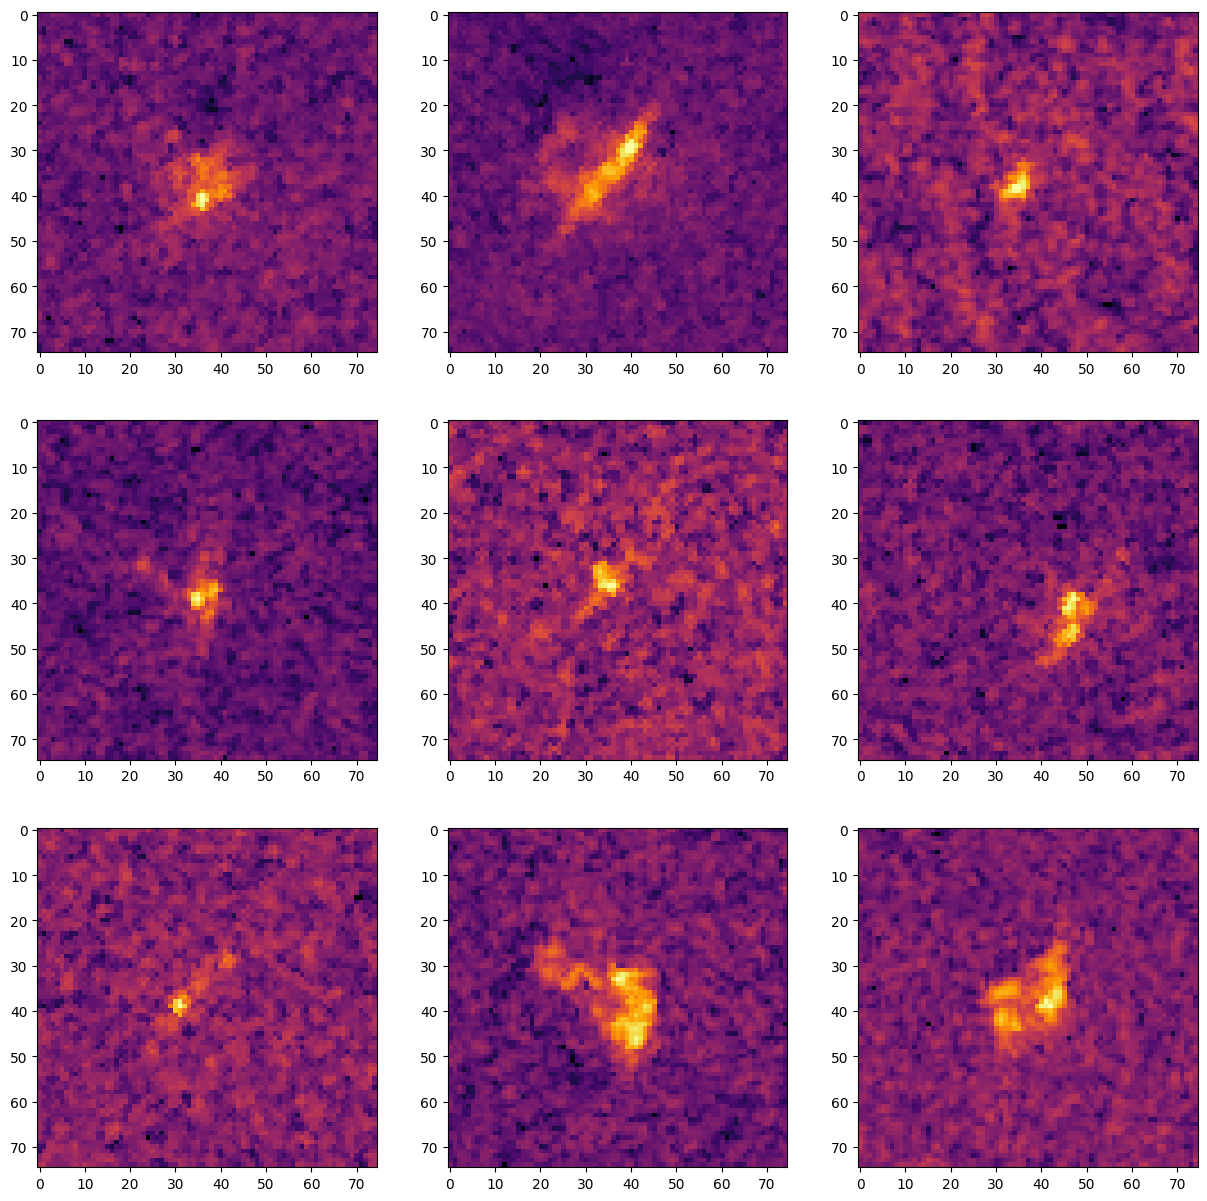

In [ ]:
# displaying 9 random iceberg pictures in band 1
fig = plt.figure(1, figsize =(15,15))
for i in range(9):
  ax =fig.add_subplot(3,3, i+1)
  arr = icebergs["band_1"].iloc[i]
  ax.imshow(arr,cmap = "inferno")

plt.show()

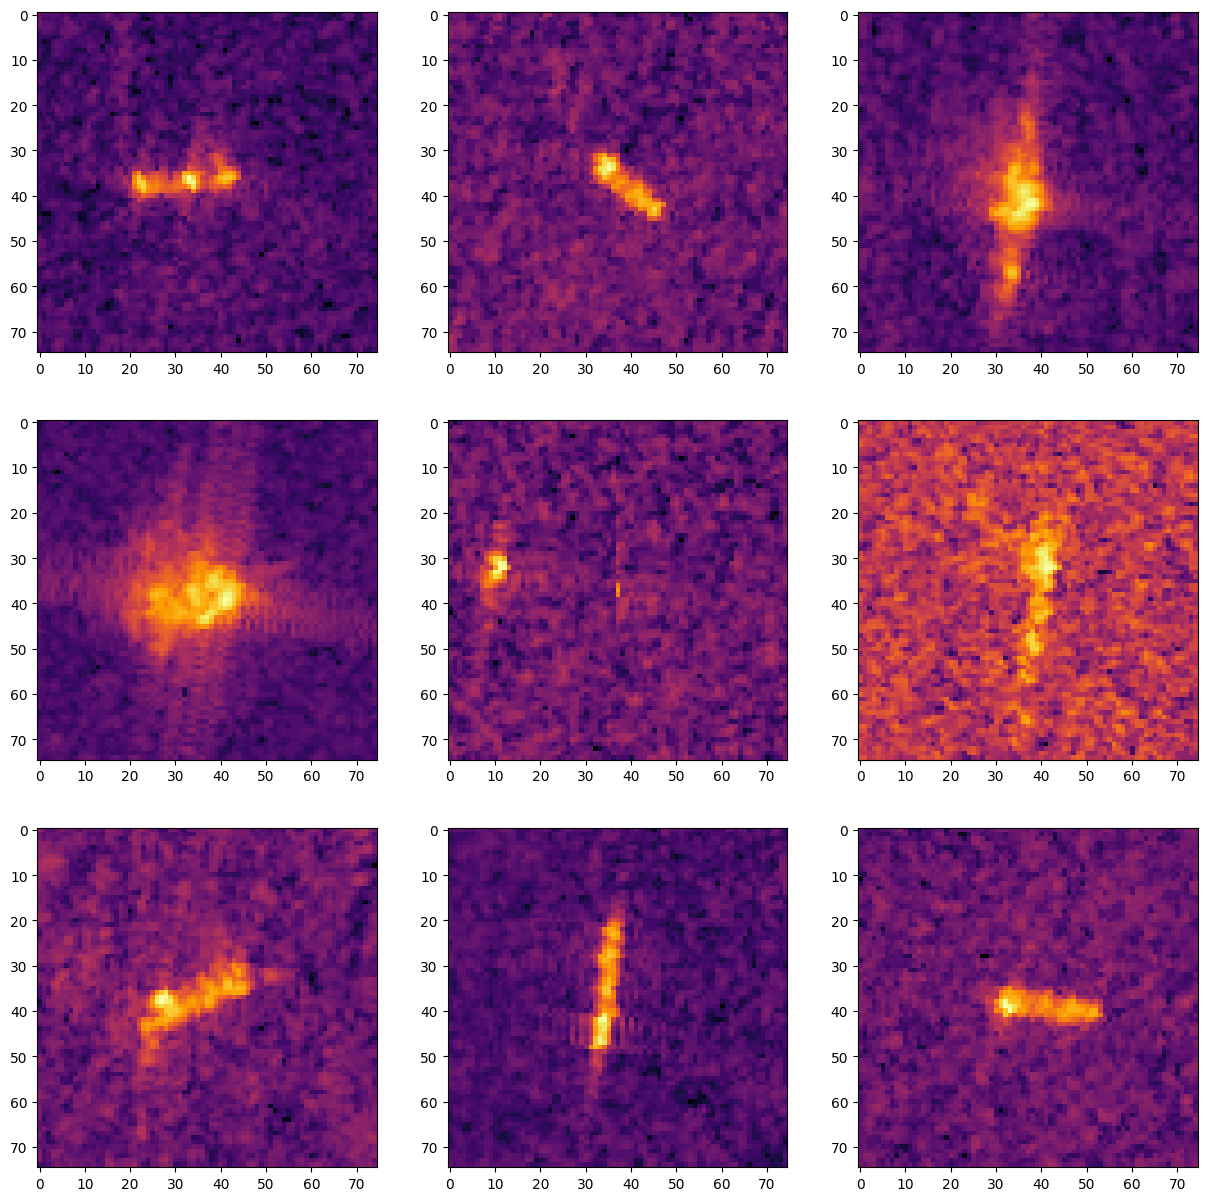

In [ ]:
# displaying 9 random ships pictures in band 1
fig = plt.figure(1, figsize =(15,15))
for i in range(9):
  ax =fig.add_subplot(3,3, i+1)
  arr = ships["band_1"].iloc[i]
  ax.imshow(arr,cmap = "inferno")

plt.show()

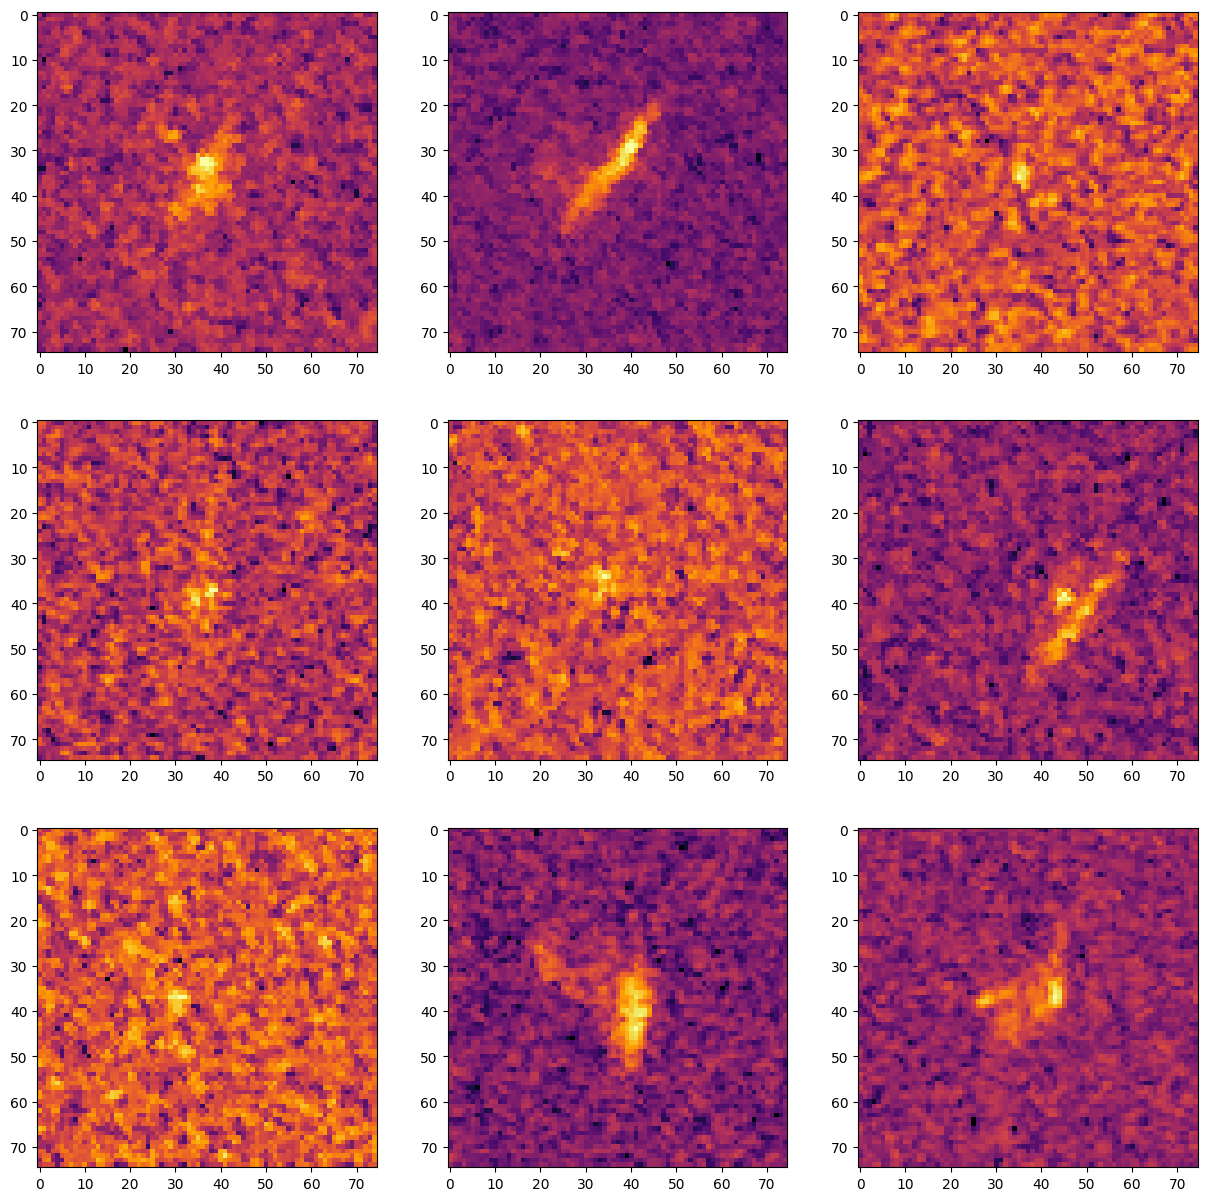

In [ ]:
# displaying 9 random iceberg pictures in band 2
fig = plt.figure(1, figsize =(15,15))
for i in range(9):
  ax =fig.add_subplot(3,3, i+1)
  arr = icebergs["band_2"].iloc[i]
  ax.imshow(arr,cmap = "inferno")

plt.show()

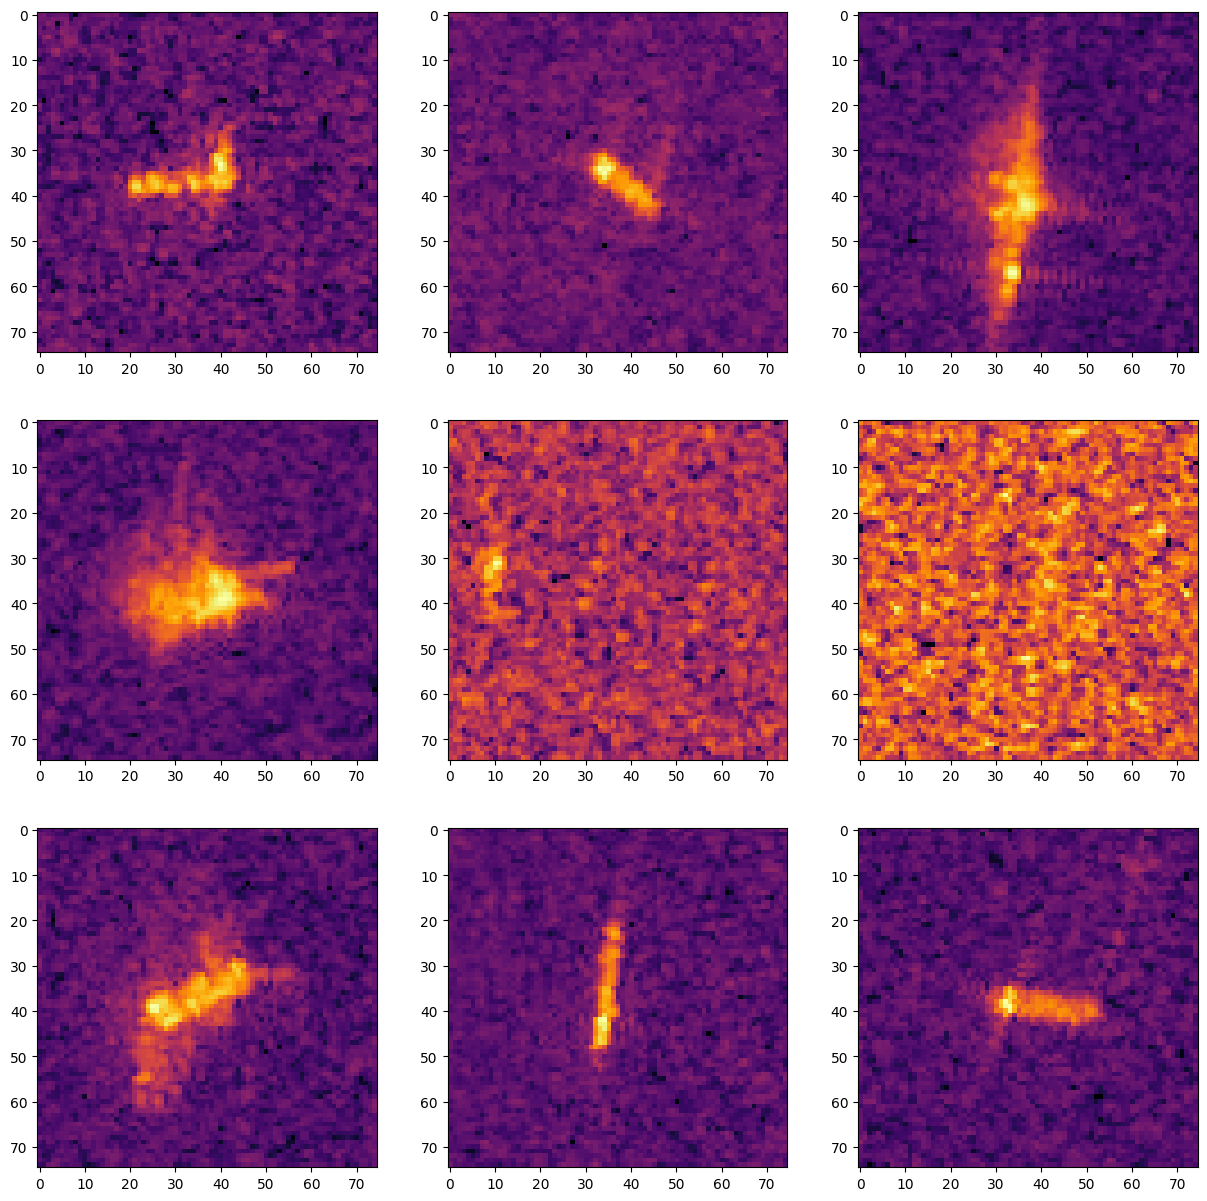

In [ ]:
# displaying 9 random ships pictures in band 2
fig = plt.figure(1, figsize =(15,15))
for i in range(9):
  ax =fig.add_subplot(3,3, i+1)
  arr = ships["band_2"].iloc[i]
  ax.imshow(arr,cmap = "inferno")

plt.show()

Transforming the images  

Just to know in the future which type of images give the best output.
Finding a filter that separates background noise from the true signal
Since SAR objects have salt ad pepper noise, I'll try SMOOTHENING FILTERS  and MEDIAN FILTERS  
After I'm going to try a high-pass filter to sharpen the edge features.

In [ ]:
#Setting up different kernels
from scipy import signal
#edge detection (gradient) - based methods
xder = np.array([[-1,2,-1],[-3,6,-3],[-1,2,-1]])
yder = np.array([[-1,-3,-1],[2,6,2],[-1,-3,-1]])
#center-weighted average (weighted box) smoothing kernel for images with small signal size to reduce noise
smooth = np.array([[1,1,1],[1,5,1],[1,1,1]])

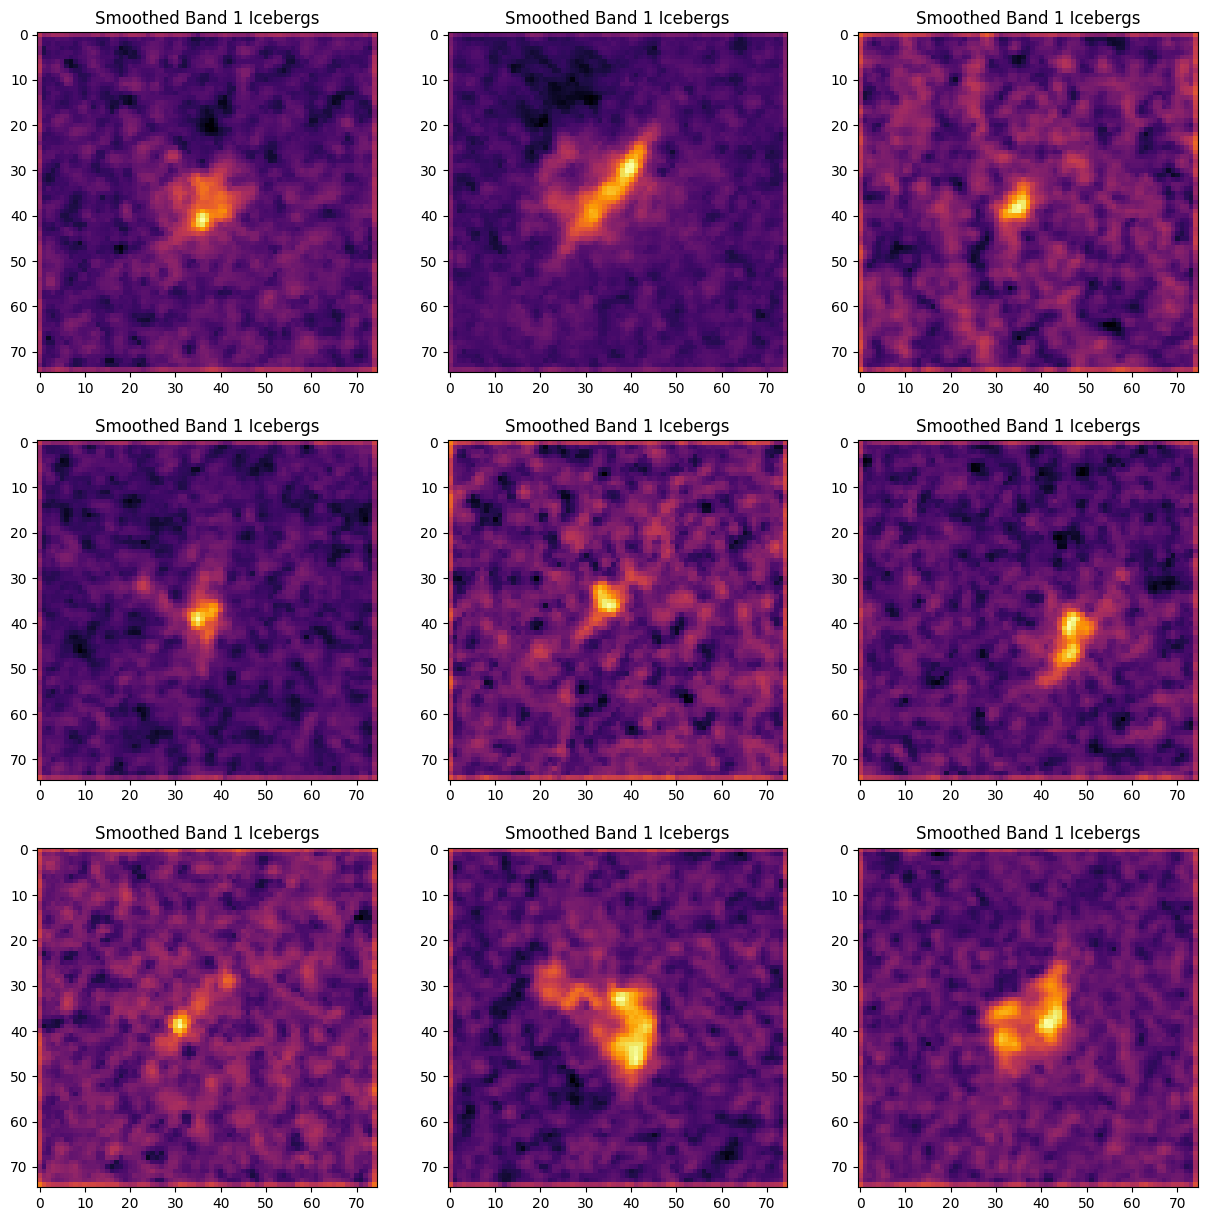

In [ ]:
#SMOOTHING
fig = plt.figure(1, figsize=(15,15))
for i in range(9):
  ax = fig.add_subplot (3,3, i+1)
  arr = signal.convolve2d(icebergs["band_1"].iloc[i], smooth, mode = "same")
  ax.imshow(arr, cmap ="inferno")
  ax.set_title ("Smoothed Band 1 Icebergs")

plt.show()

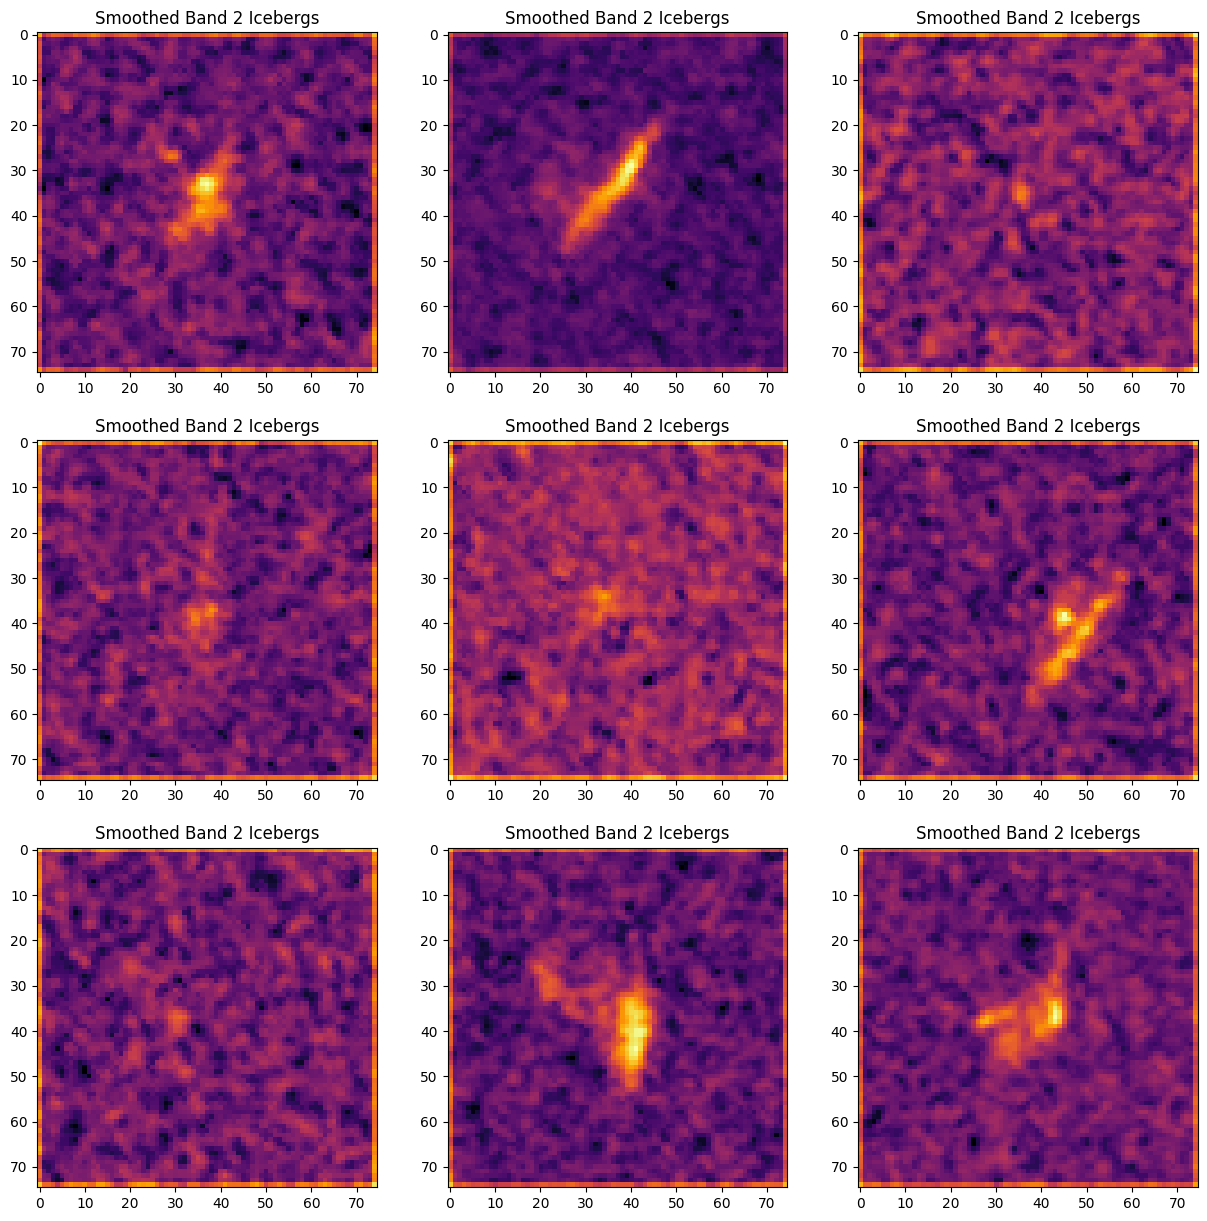

In [ ]:
#SMOOTHING
fig = plt.figure(1, figsize=(15,15))
for i in range(9):
  ax = fig.add_subplot (3,3, i+1)
  arr = signal.convolve2d(icebergs["band_2"].iloc[i], smooth, mode = "same")
  ax.imshow(arr, cmap ="inferno")
  ax.set_title ("Smoothed Band 2 Icebergs")
plt.show()

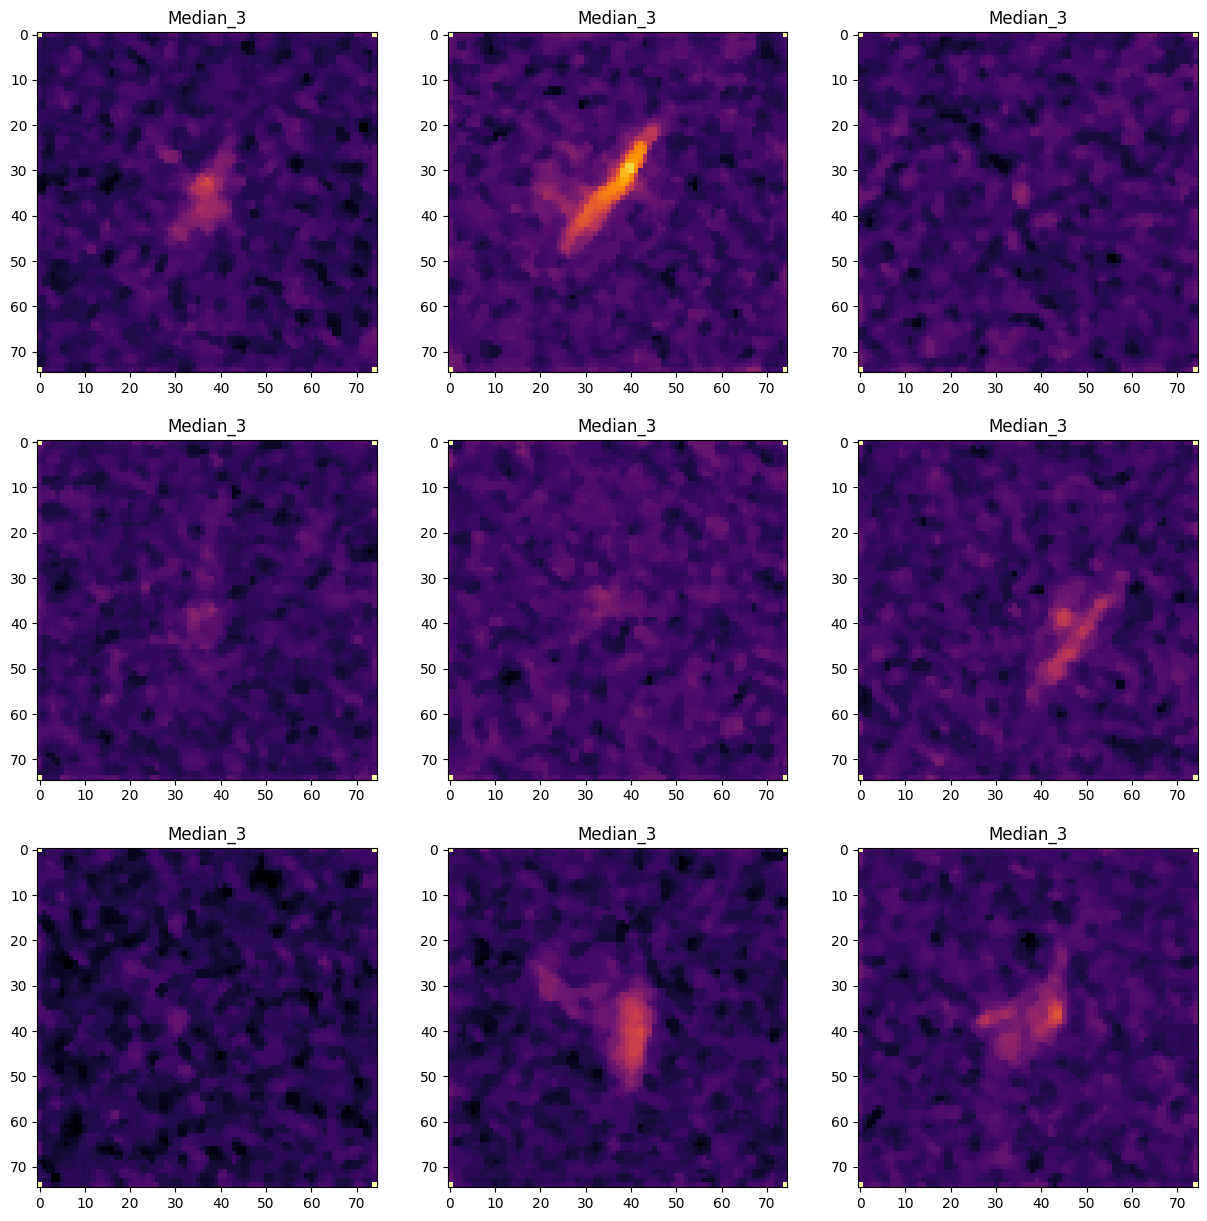

In [ ]:
#MEDIAN FILTER

fig = plt.figure(1, figsize= (15,15))
for i in range(9):
  ax = fig.add_subplot(3,3, i+1)
  arr = icebergs["band_2"].iloc[i]
  median_3 =signal.medfilt(arr, kernel_size=3)
  ax.imshow (median_3, cmap = "inferno")
  ax.set_title("Median_3")

plt.show()

Analysis: Smoothed images produced satisfactory results; however, the median_3 images appeared too blurry. Next, an edge detection filter will be applied, followed by sharpening the edges in both the smoothed and median_3 images.

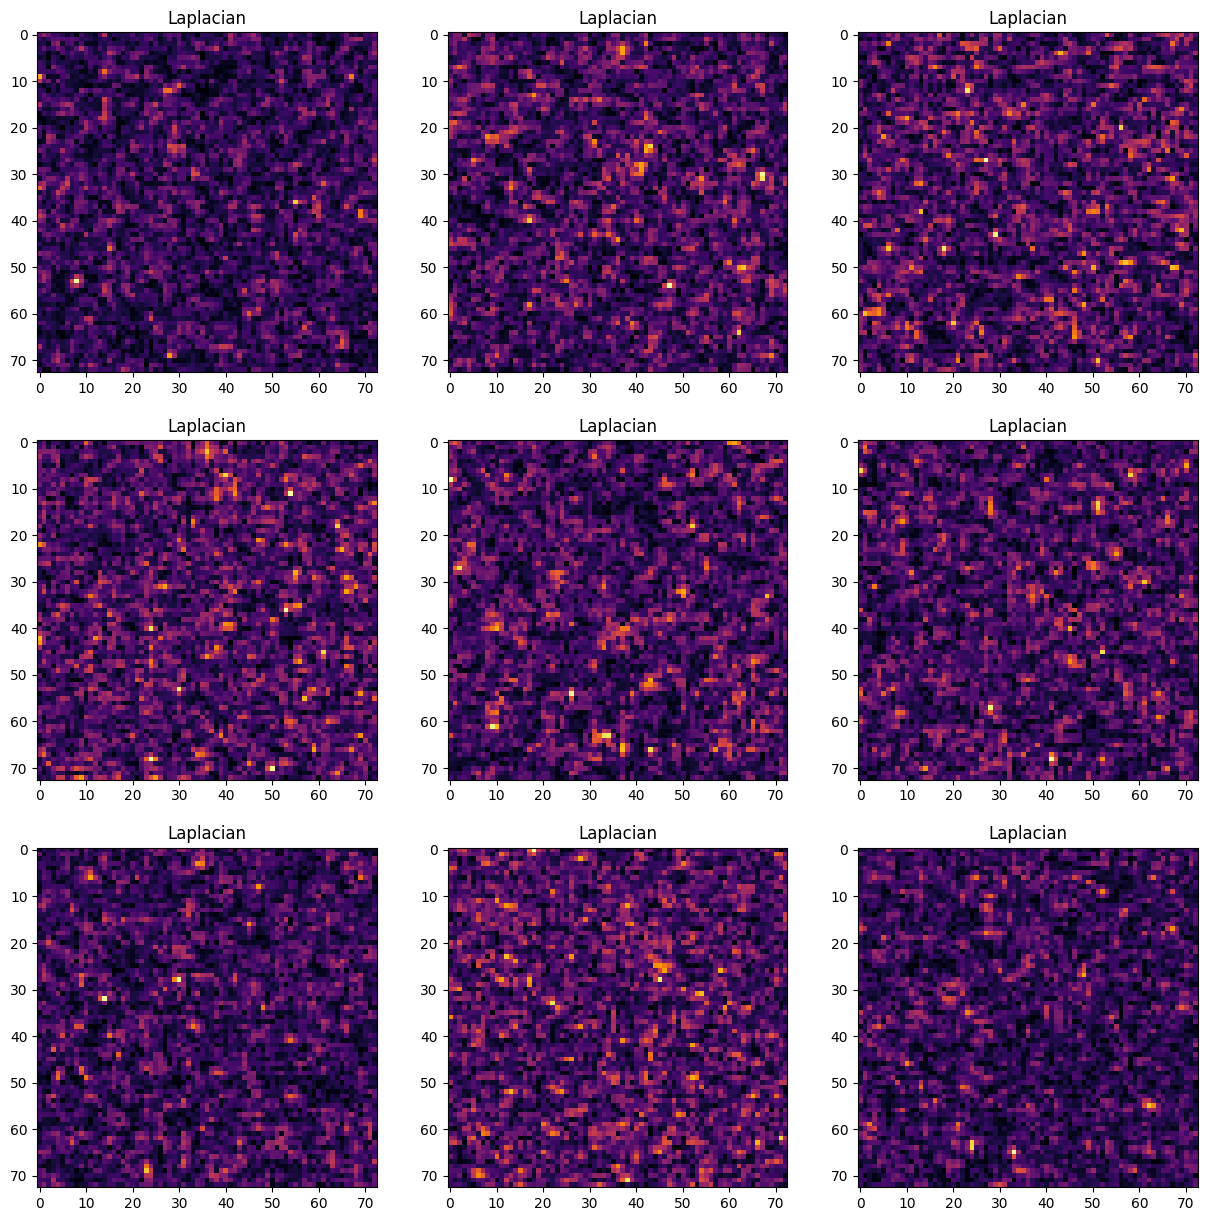

In [ ]:
#Second Derivatives (Laplacian)
fig = plt.figure(1, figsize= (15,15))
for i in range(9):
  ax = fig.add_subplot(3,3, i+1)
  arrx = signal.convolve2d(icebergs["band_2"].iloc[i], xder, mode ="valid")
  arry = signal.convolve2d(icebergs["band_2"].iloc[i], yder, mode ="valid")
  ax.imshow (np.hypot(arrx,arry), cmap = "inferno")
  ax.set_title("Laplacian")

plt.show()

In [ ]:
# High-pass filter kernel
high_pass = np.array([[-1,-1,-1],
                      [-1, 8,-1],
                      [-1,-1,-1]])

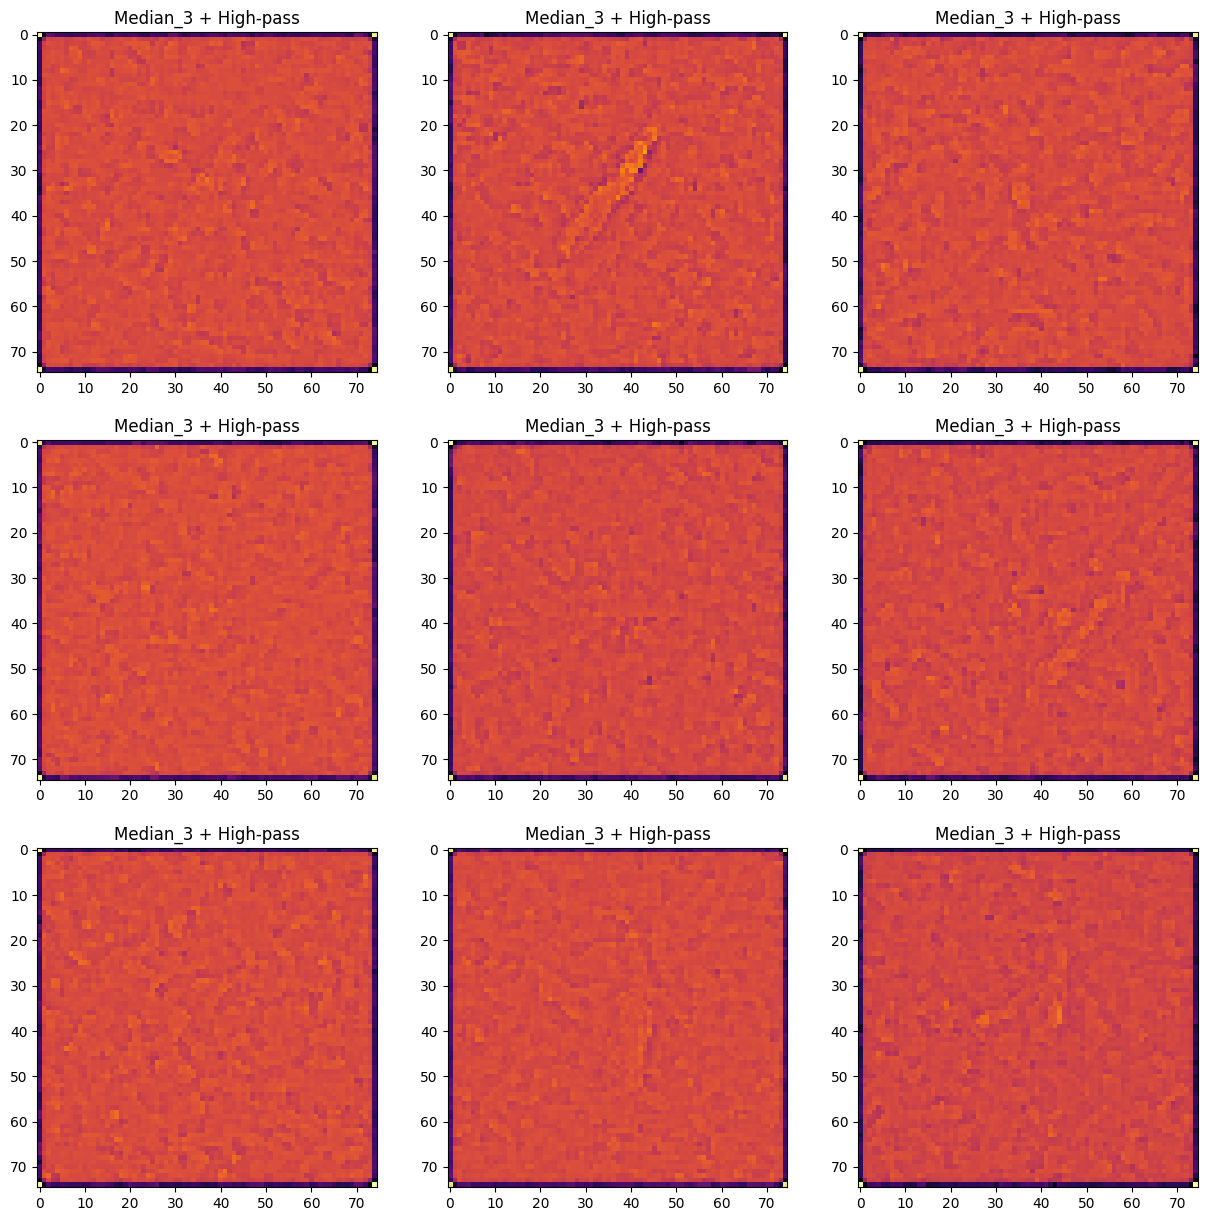

In [ ]:
#Applying a High Pass filter to the Median_3
fig = plt.figure(1, figsize= (15,15))
for i in range(9):
  ax = fig.add_subplot(3,3, i+1)
  arr = icebergs["band_2"].iloc[i]
  median_3 =signal.medfilt(arr, kernel_size=3)
  high_passed = signal.convolve2d (median_3, high_pass, mode ="same")
  ax.imshow (high_passed, cmap = "inferno")
  ax.set_title("Median_3 + High-pass")

plt.show()

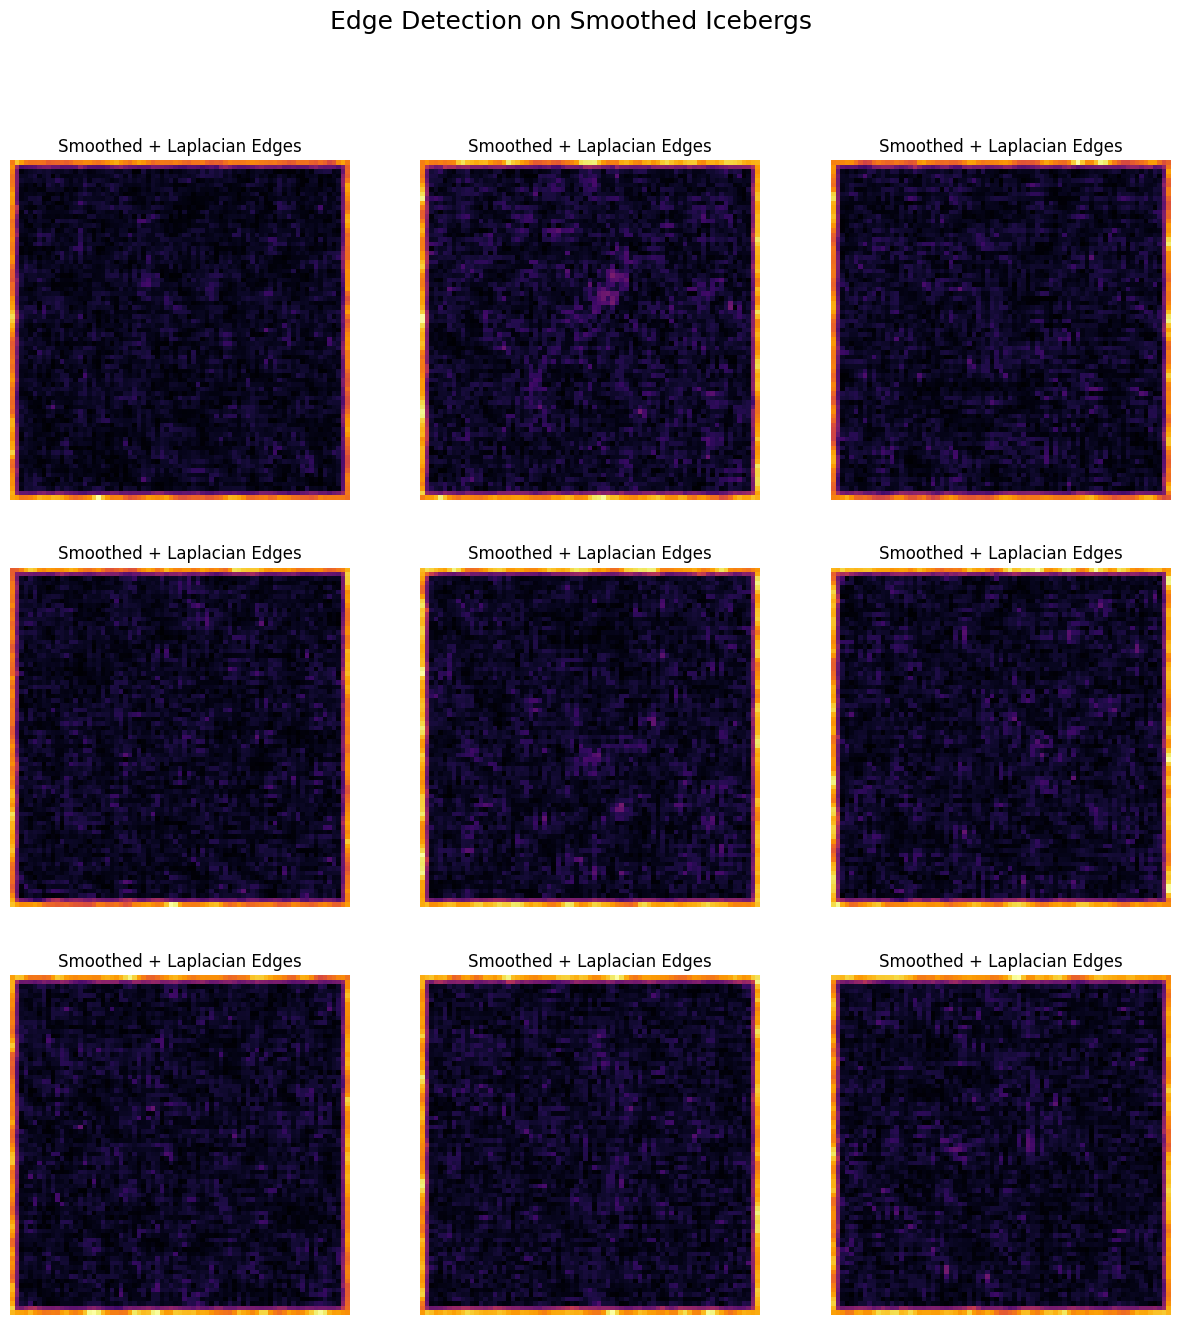

In [ ]:
#Applying a High Pass filter (Laplacian) to Smoothed
fig = plt.figure(1, figsize=(15,15))
for i in range(9):
  ax = fig.add_subplot (3,3, i+1)
  smoothed = signal.convolve2d(icebergs["band_2"].iloc[i], smooth, mode="same")
  grad_x = signal.convolve2d(smoothed, xder, mode="same")
  grad_y = signal.convolve2d(smoothed, yder, mode="same")

  edge_magnitude = np.sqrt(grad_x**2 + grad_y**2)

  ax.imshow(edge_magnitude, cmap="inferno")
  ax.set_title("Smoothed + Laplacian Edges")
  ax.axis("off")

fig.suptitle("Edge Detection on Smoothed Icebergs", fontsize=18)
plt.show()

Analysis: Applying a smoothing filter or median filter first to denoise, followed by an edge detector to highlight structures, may not be effective. So far, the smoothed filter alone produced the best results.

## Exploring Correlations

Few other interesting features to take a look at.

In [ ]:
df['inc_angle'] = pd.to_numeric(df['inc_angle'], errors='coerce')
df['hv_hh_ratio'] = df['band_2'] / (df['band_1'])
df['total_power'] = df['band_1'] + df['band_2']

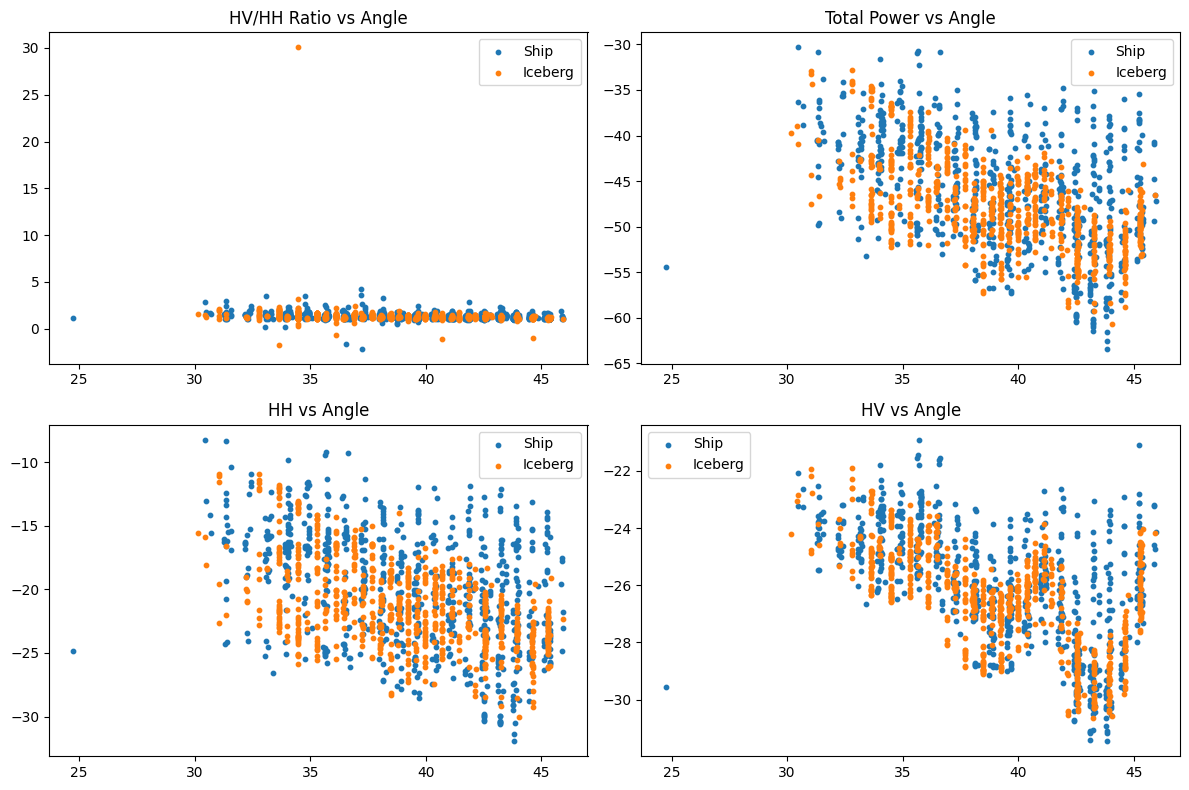

In [ ]:
df['ratio_mean'] = df['hv_hh_ratio'].apply(np.mean)
df['power_mean'] = df['total_power'].apply(np.mean)
df['band_1_mean'] = df['band_1'].apply(np.mean)
df['band_2_mean'] = df['band_2'].apply(np.mean)

ships = df[df['is_iceberg'] == 0]
icebergs = df[df['is_iceberg'] == 1]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0,0].scatter(ships['inc_angle'], ships['ratio_mean'], label='Ship', s=10)
axes[0,0].scatter(icebergs['inc_angle'], icebergs['ratio_mean'], label='Iceberg', s=10)
axes[0,0].set_title('HV/HH Ratio vs Angle')
axes[0,0].legend()

axes[0,1].scatter(ships['inc_angle'], ships['power_mean'], label='Ship', s=10)
axes[0,1].scatter(icebergs['inc_angle'], icebergs['power_mean'], label='Iceberg', s=10)
axes[0,1].set_title('Total Power vs Angle')
axes[0,1].legend()

axes[1,0].scatter(ships['inc_angle'], ships['band_1_mean'], label='Ship', s=10)
axes[1,0].scatter(icebergs['inc_angle'], icebergs['band_1_mean'], label='Iceberg', s=10)
axes[1,0].set_title('HH vs Angle')
axes[1,0].legend()

axes[1,1].scatter(ships['inc_angle'], ships['band_2_mean'], label='Ship', s=10)
axes[1,1].scatter(icebergs['inc_angle'], icebergs['band_2_mean'], label='Iceberg', s=10)
axes[1,1].set_title('HV vs Angle')
axes[1,1].legend()

plt.tight_layout()
plt.show()

There seems to be a general trend of less energy as the angle increases which verifies the physics behind SAR imagery.

Keep in mind, these are means and take into account the ocean as well as the ships/vessels.

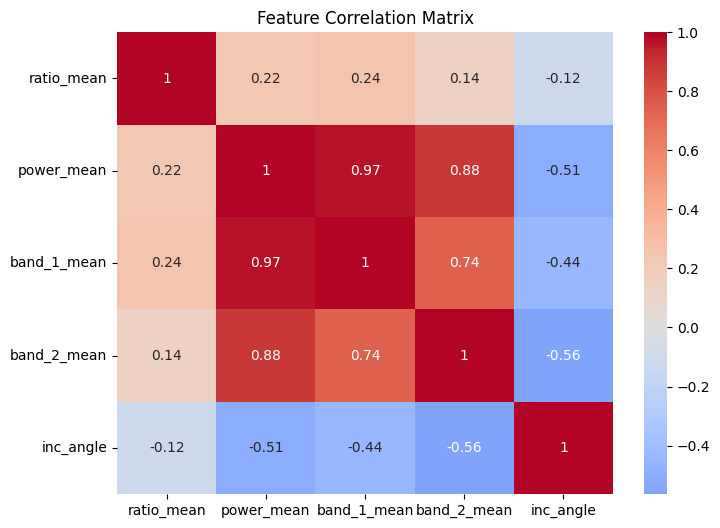

In [ ]:
features = ['ratio_mean', 'power_mean', 'band_1_mean', 'band_2_mean', 'inc_angle']
corr_matrix = df[features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

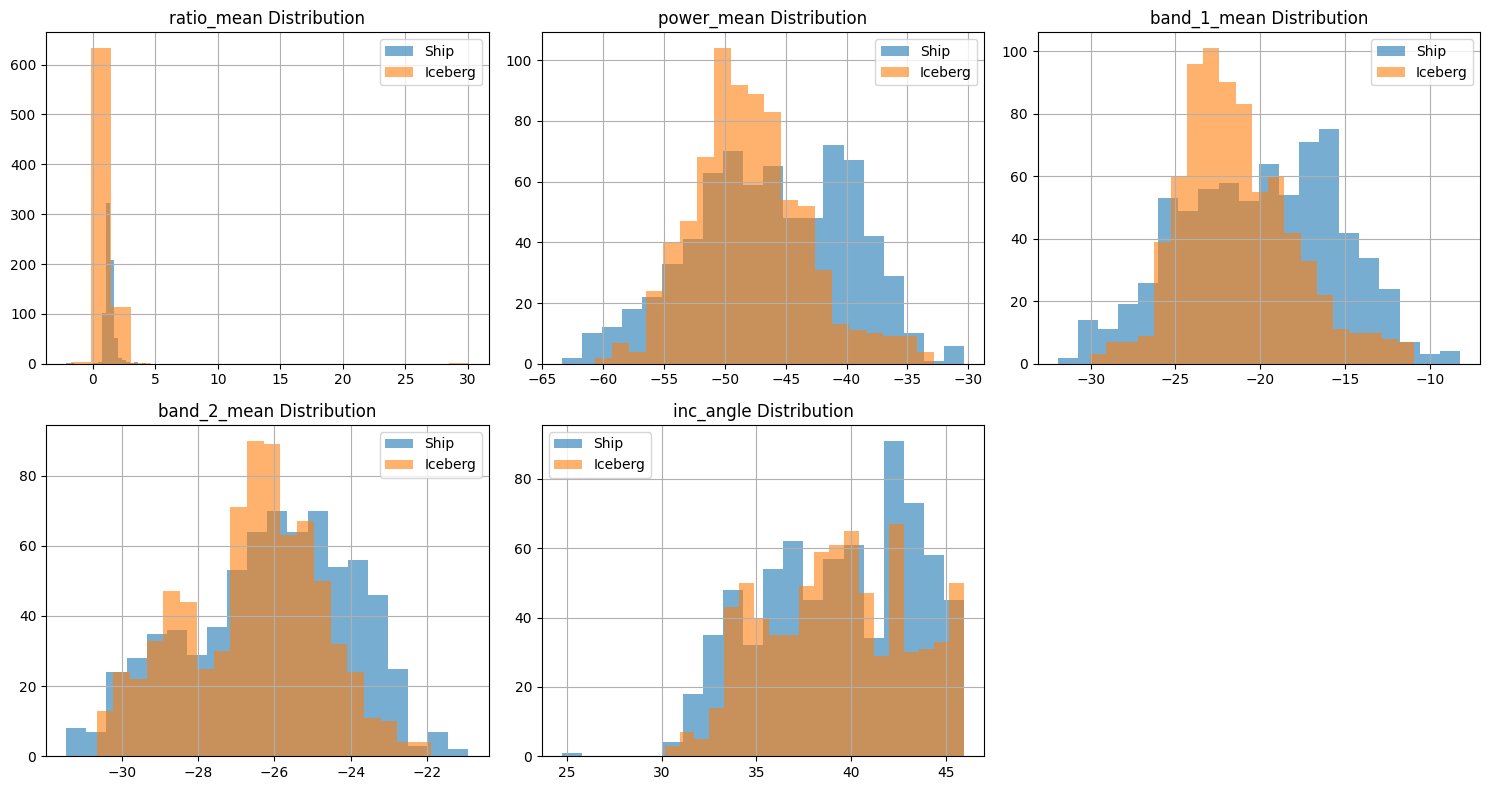

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for i, feature in enumerate(features):
   ax = axes[i//3, i%3]
   ships[feature].hist(alpha=0.6, bins=20, label='Ship', ax=ax)
   icebergs[feature].hist(alpha=0.6, bins=20, label='Iceberg', ax=ax)
   ax.set_title(f'{feature} Distribution')
   ax.legend()

axes[1, 2].remove()

plt.tight_layout()
plt.show()

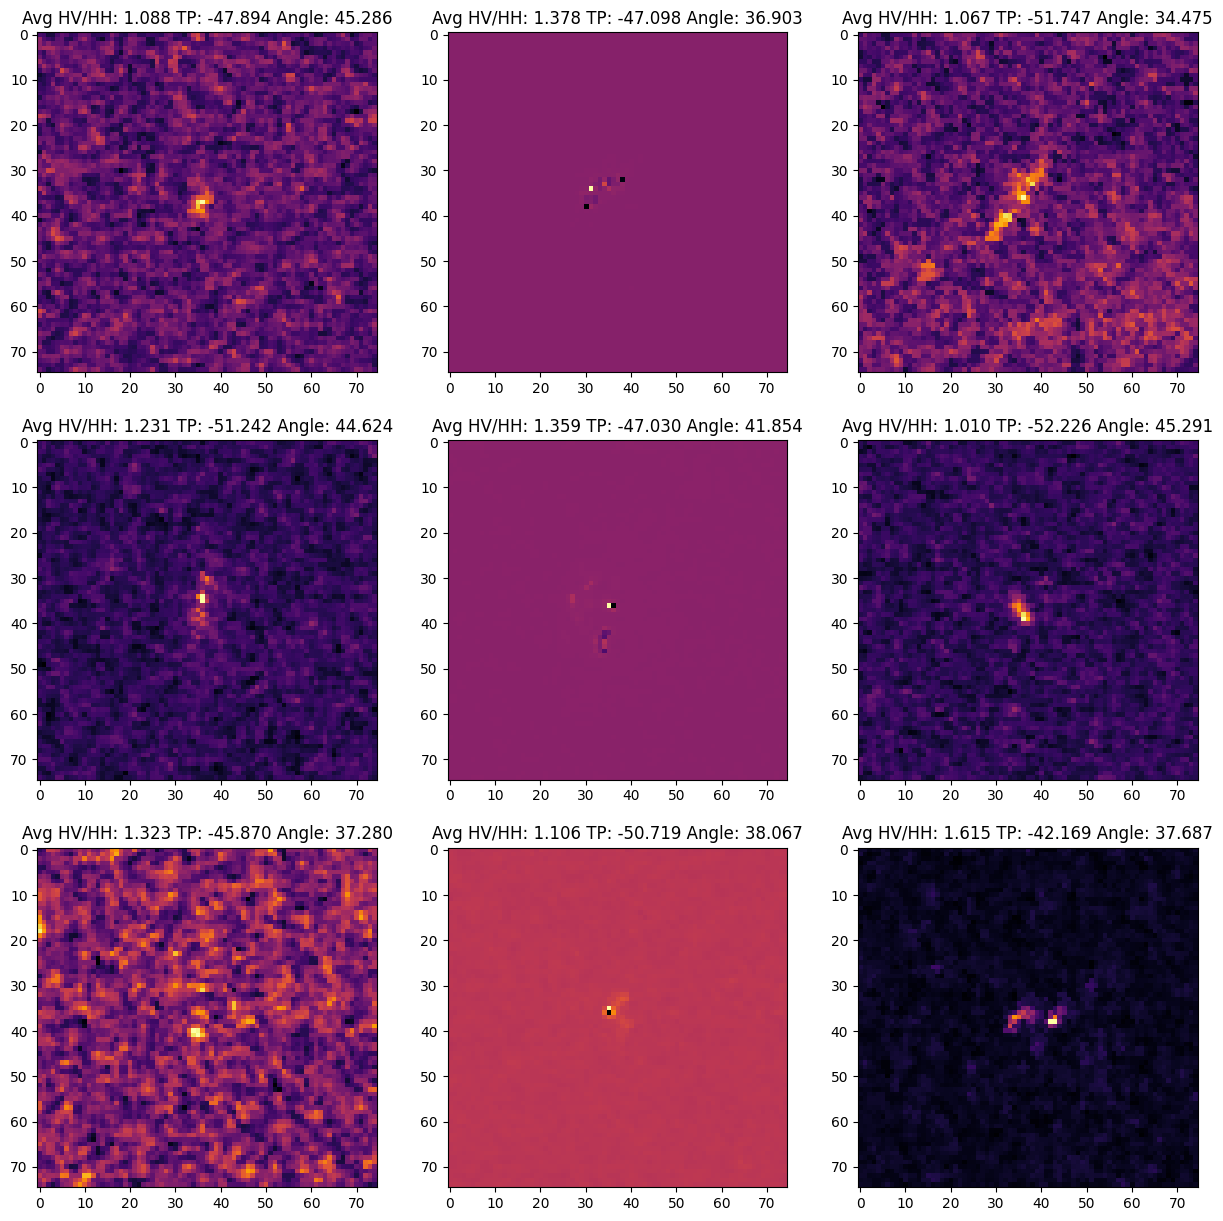

In [ ]:
# displaying 9 random iceberg pictures in HV/HH
fig = plt.figure(1, figsize =(15,15))
for i in range(9):
  ax =fig.add_subplot(3,3, i+1)
  arr = icebergs["hv_hh_ratio"].iloc[i]
  avg_ratio = icebergs["ratio_mean"].iloc[i]
  tp = icebergs["power_mean"].iloc[i]
  angle = icebergs["inc_angle"].iloc[i]
  ax.imshow(arr,cmap = "inferno")
  ax.set_title(f'Avg HV/HH: {avg_ratio:.3f} TP: {tp:.3f} Angle: {angle:.3f}')


plt.show()

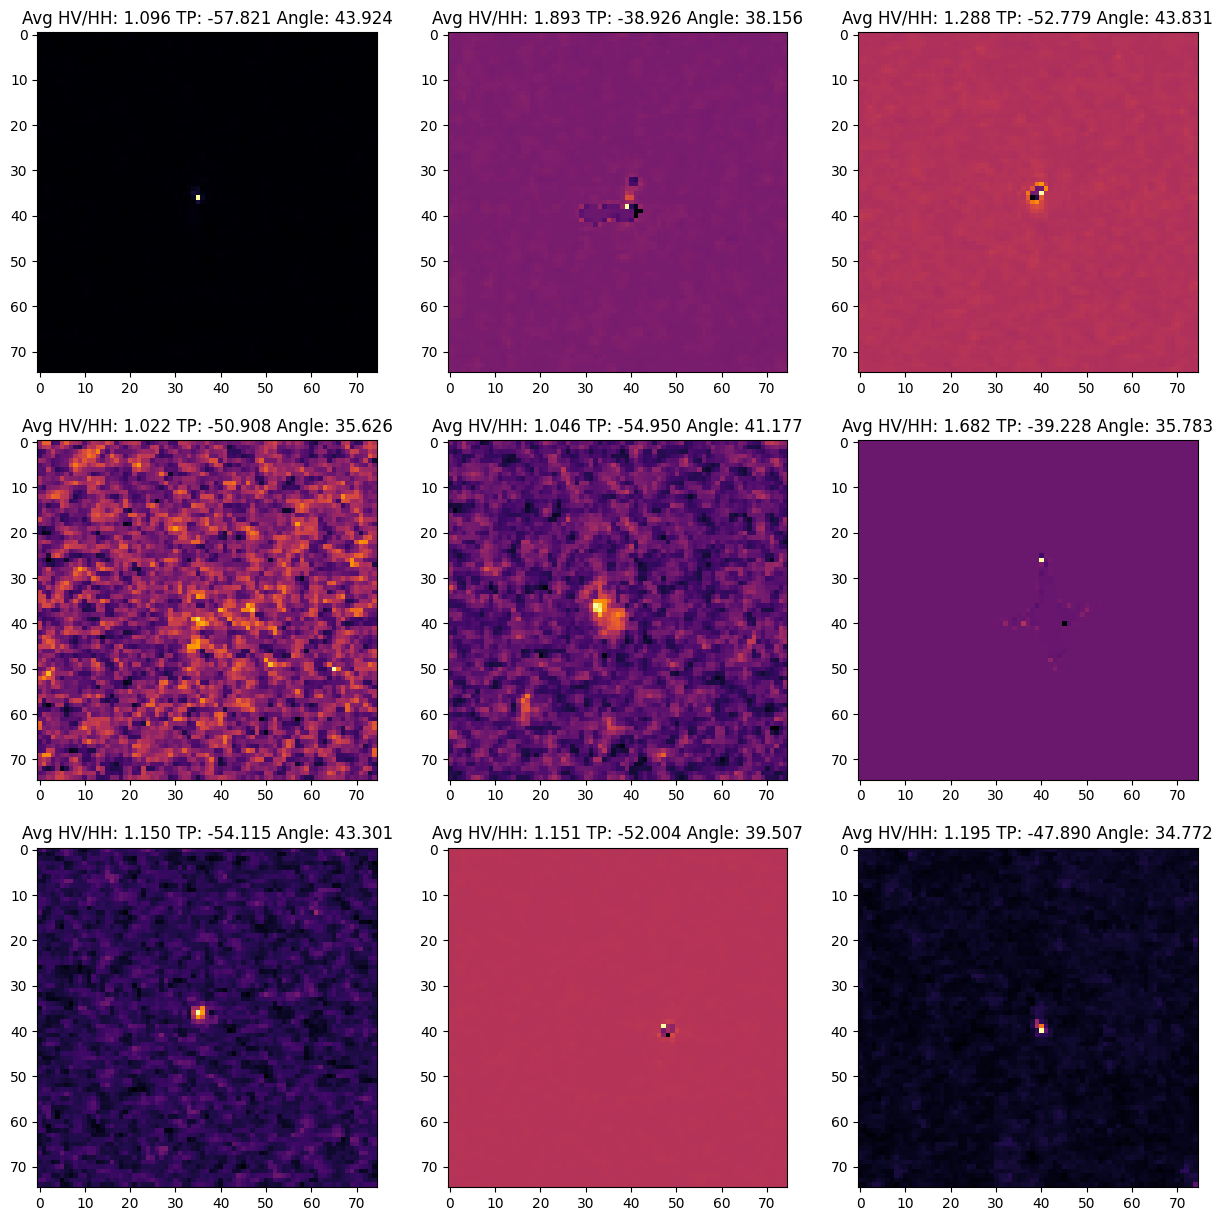

In [ ]:
# displaying 9 random ships pictures in HV/HH
fig = plt.figure(1, figsize =(15,15))
for i in range(9):
  ax =fig.add_subplot(3,3, i+1)
  arr = ships["hv_hh_ratio"].iloc[i]
  avg_ratio = ships["ratio_mean"].iloc[i]
  tp = ships["power_mean"].iloc[i]
  angle = ships["inc_angle"].iloc[i]
  ax.imshow(arr,cmap = "inferno")
  ax.set_title(f'Avg HV/HH: {avg_ratio:.3f} TP: {tp:.3f} Angle: {angle:.3f}')

plt.show()

# Speckle Filtering

Rids SAR speckles using Lee's filter (reduces speckle noise while preserving edges)

How does Lee's filter work?
*   Band1/Band2 consist of backscatter values (how much each pixel reflects. low backscatter = less significant)
*   Calculate the average/variance of backscatter around each pixel
*   Compare the avg/var of each pixel to overall avg/var of the image --> create a weight of each pixel's signfiicance
*   Apply the weight to each pixel

Thus, water pixels will hold less weight than iceberg/vessel pixels.





In [ ]:
# SPECKLE FILTERING FUNCTION
from scipy.ndimage import uniform_filter

def lee_filter (img, size = 5):
  # Get local mean around an image
  img_mean = uniform_filter(img, size)

  # Get local variance around an image
  img_sqr_mean = uniform_filter(img**2, size)
  img_var = img_sqr_mean - img_mean**2

  # Overall image variance
  overall_var = np.var(img)

  # Calculate weight
  k = img_var / (img_var + overall_var + 1e-8) # +1e-8 is to prevent division by 0

  # Apply Lee filter
  img_filtered = img_mean+ k * (img - img_mean)

  return img_filtered

In [ ]:
# PLOTTING 9 SMOOTHED + SPECKLE FILTERED IMAGES
def plot_smoothed_sf_images (df, label, band):
  fig = plt.figure(1, figsize=(15,15))
  fig.suptitle(f"Smoothed + Speckle Filtered {band} {label} Images", fontsize = 20)

  for i in range(9):
    ax = fig.add_subplot (3,3, i+1)

    # OG image
    og = df[band].iloc[i]

    # Apply smoothing
    smoothed = signal.convolve2d(og, smooth, mode = "same")

    # Apply speckle filtering
    sf = lee_filter(smoothed, size = 5)

    # Plot
    ax.imshow(sf, cmap ="inferno")
    ax.set_title (f"{label} {i+1}")
    ax.axis("off")

  plt.tight_layout()
  plt.show()

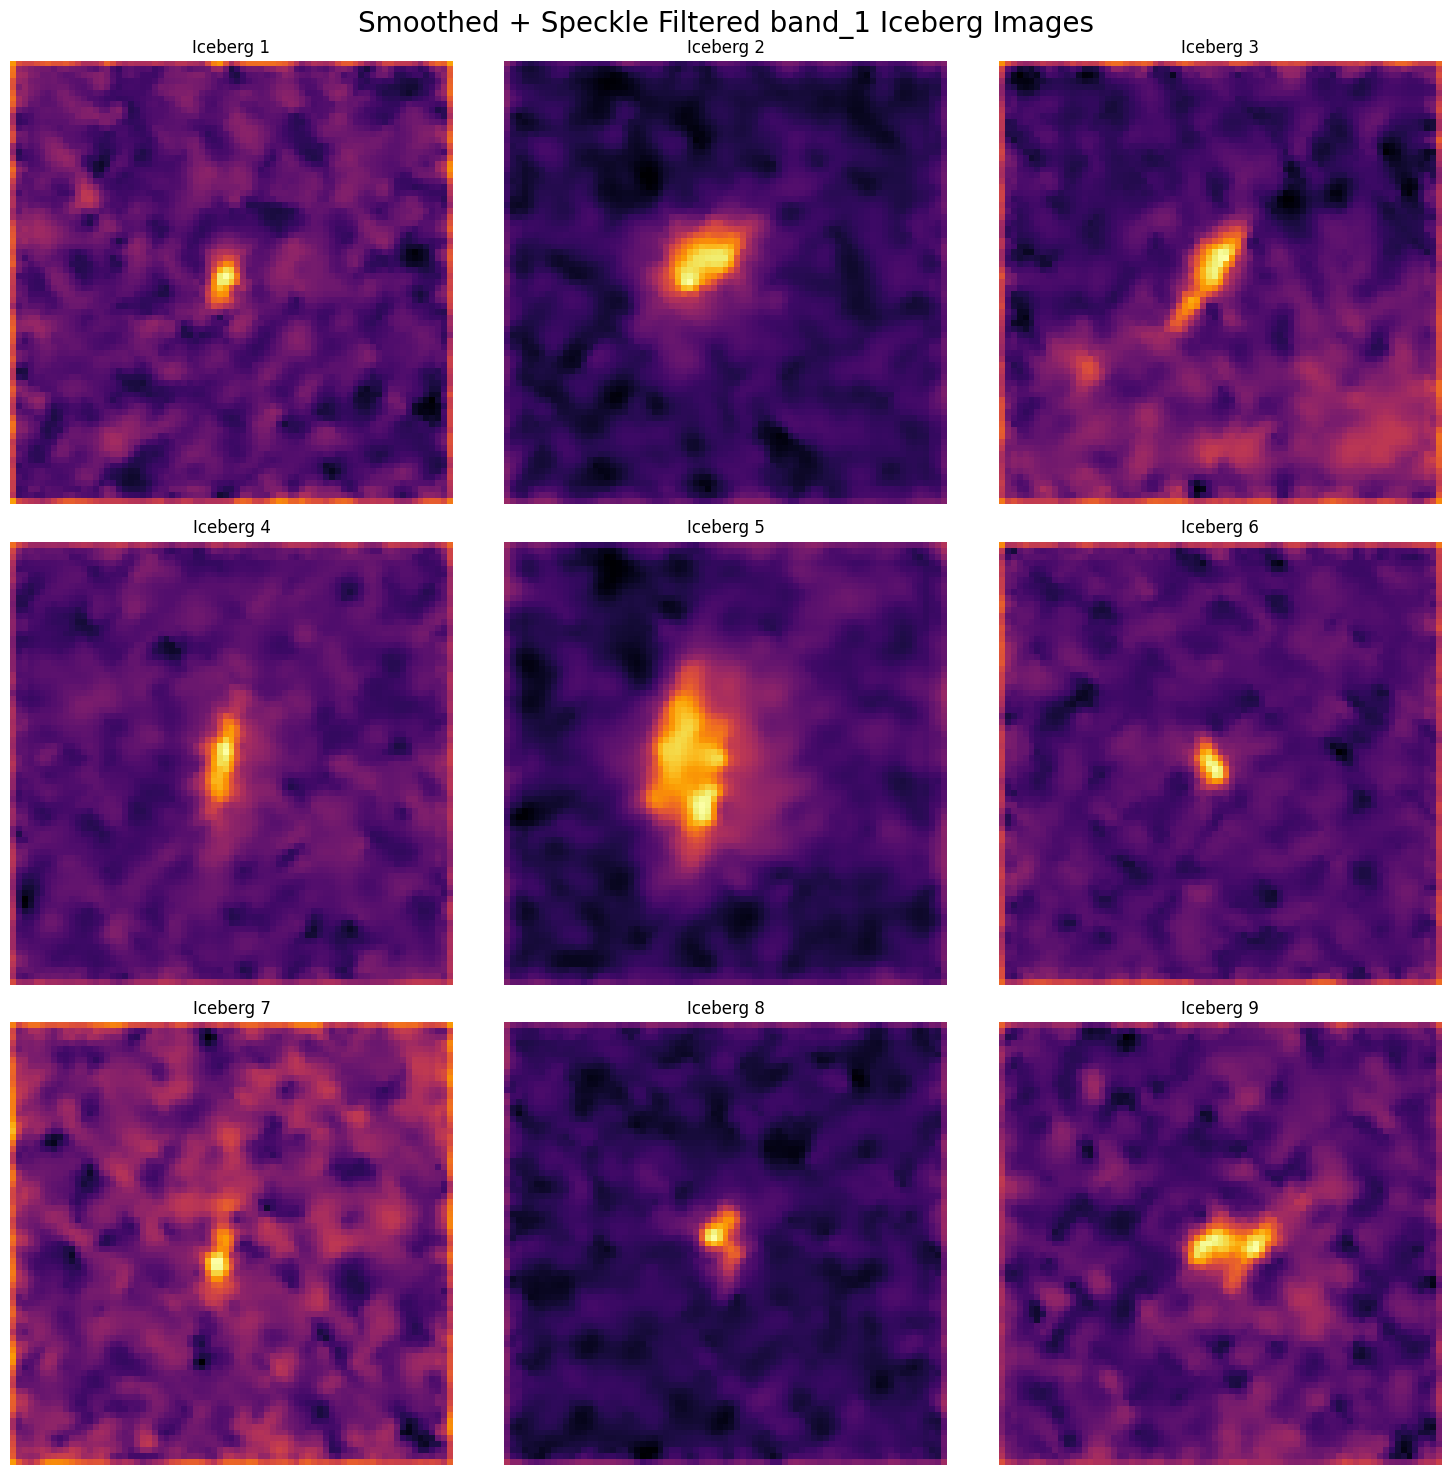

In [ ]:
plot_smoothed_sf_images(icebergs, "Iceberg", "band_1")

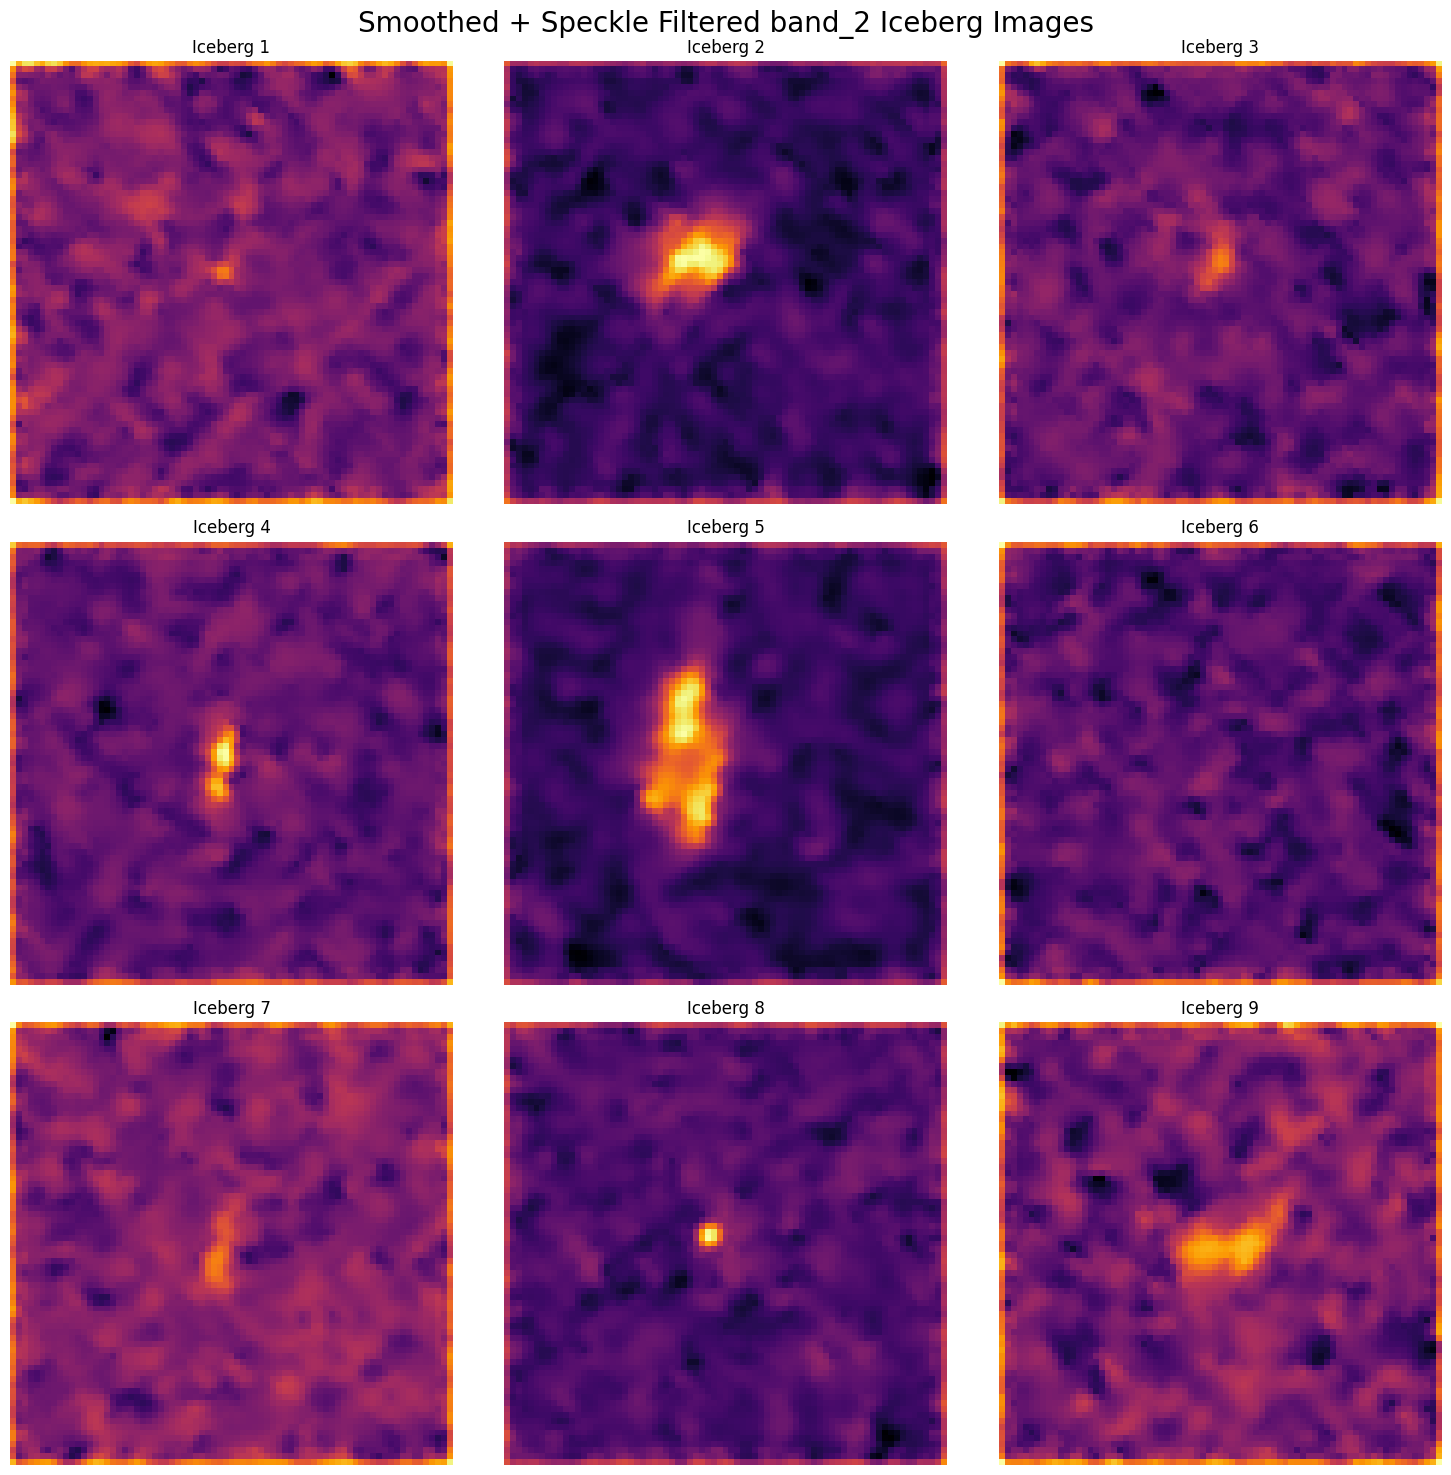

In [ ]:
plot_smoothed_sf_images(icebergs, "Iceberg", "band_2")

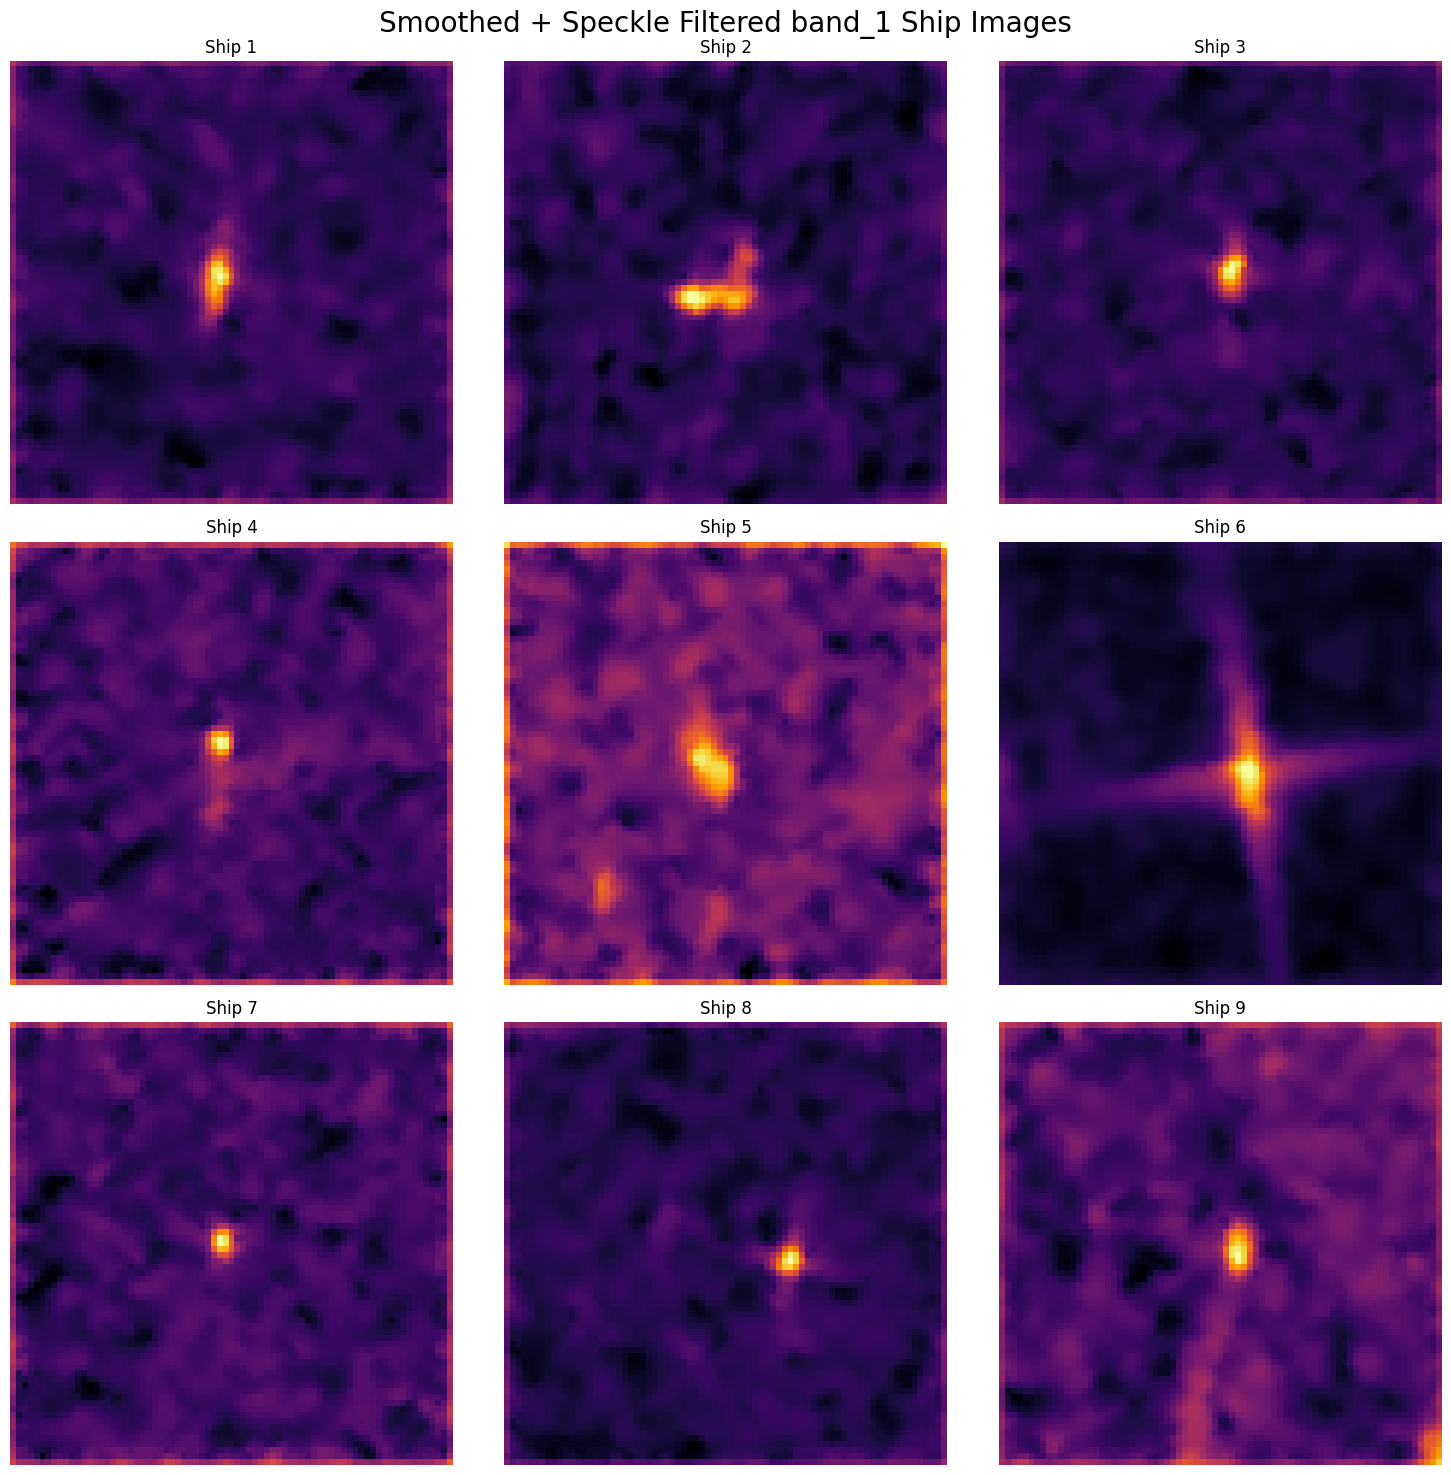

In [ ]:
plot_smoothed_sf_images(ships, "Ship", "band_1")

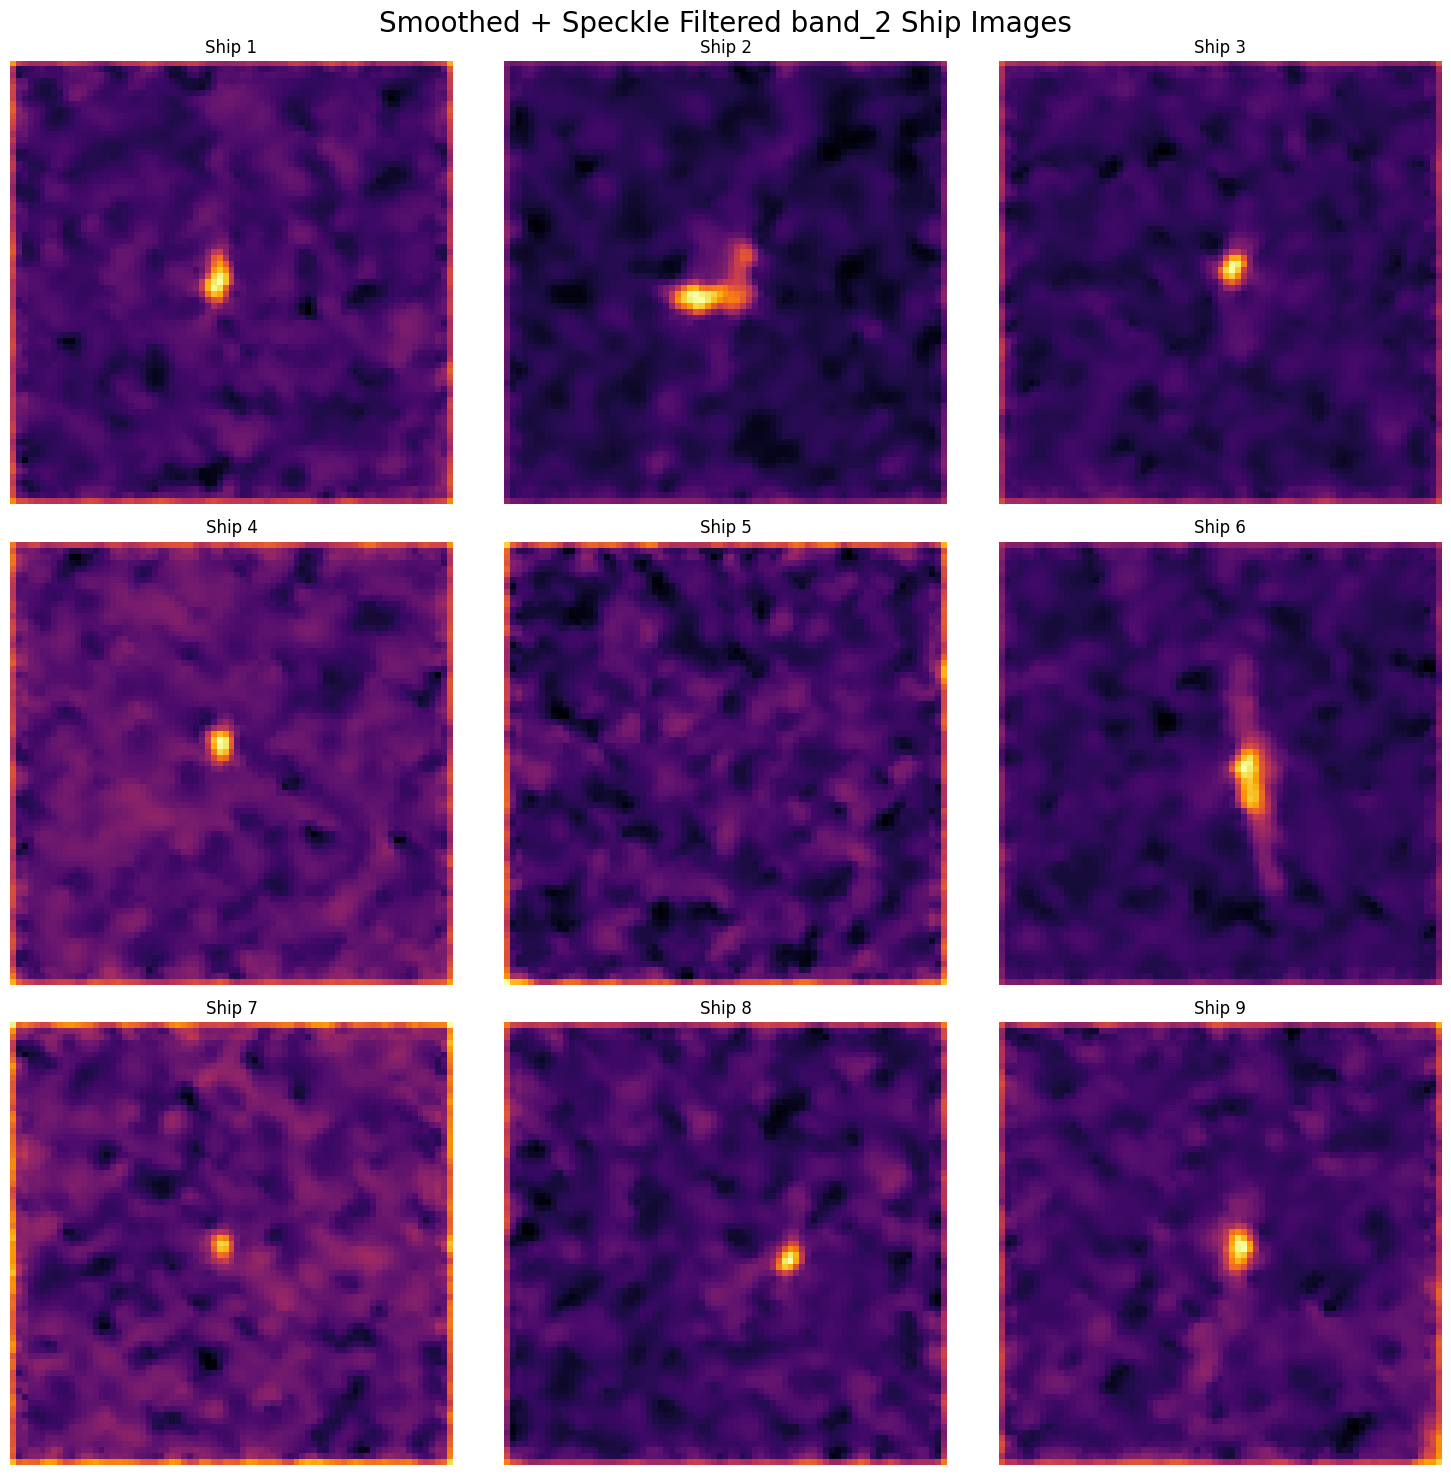

In [ ]:
plot_smoothed_sf_images(ships, "Ship", "band_2")

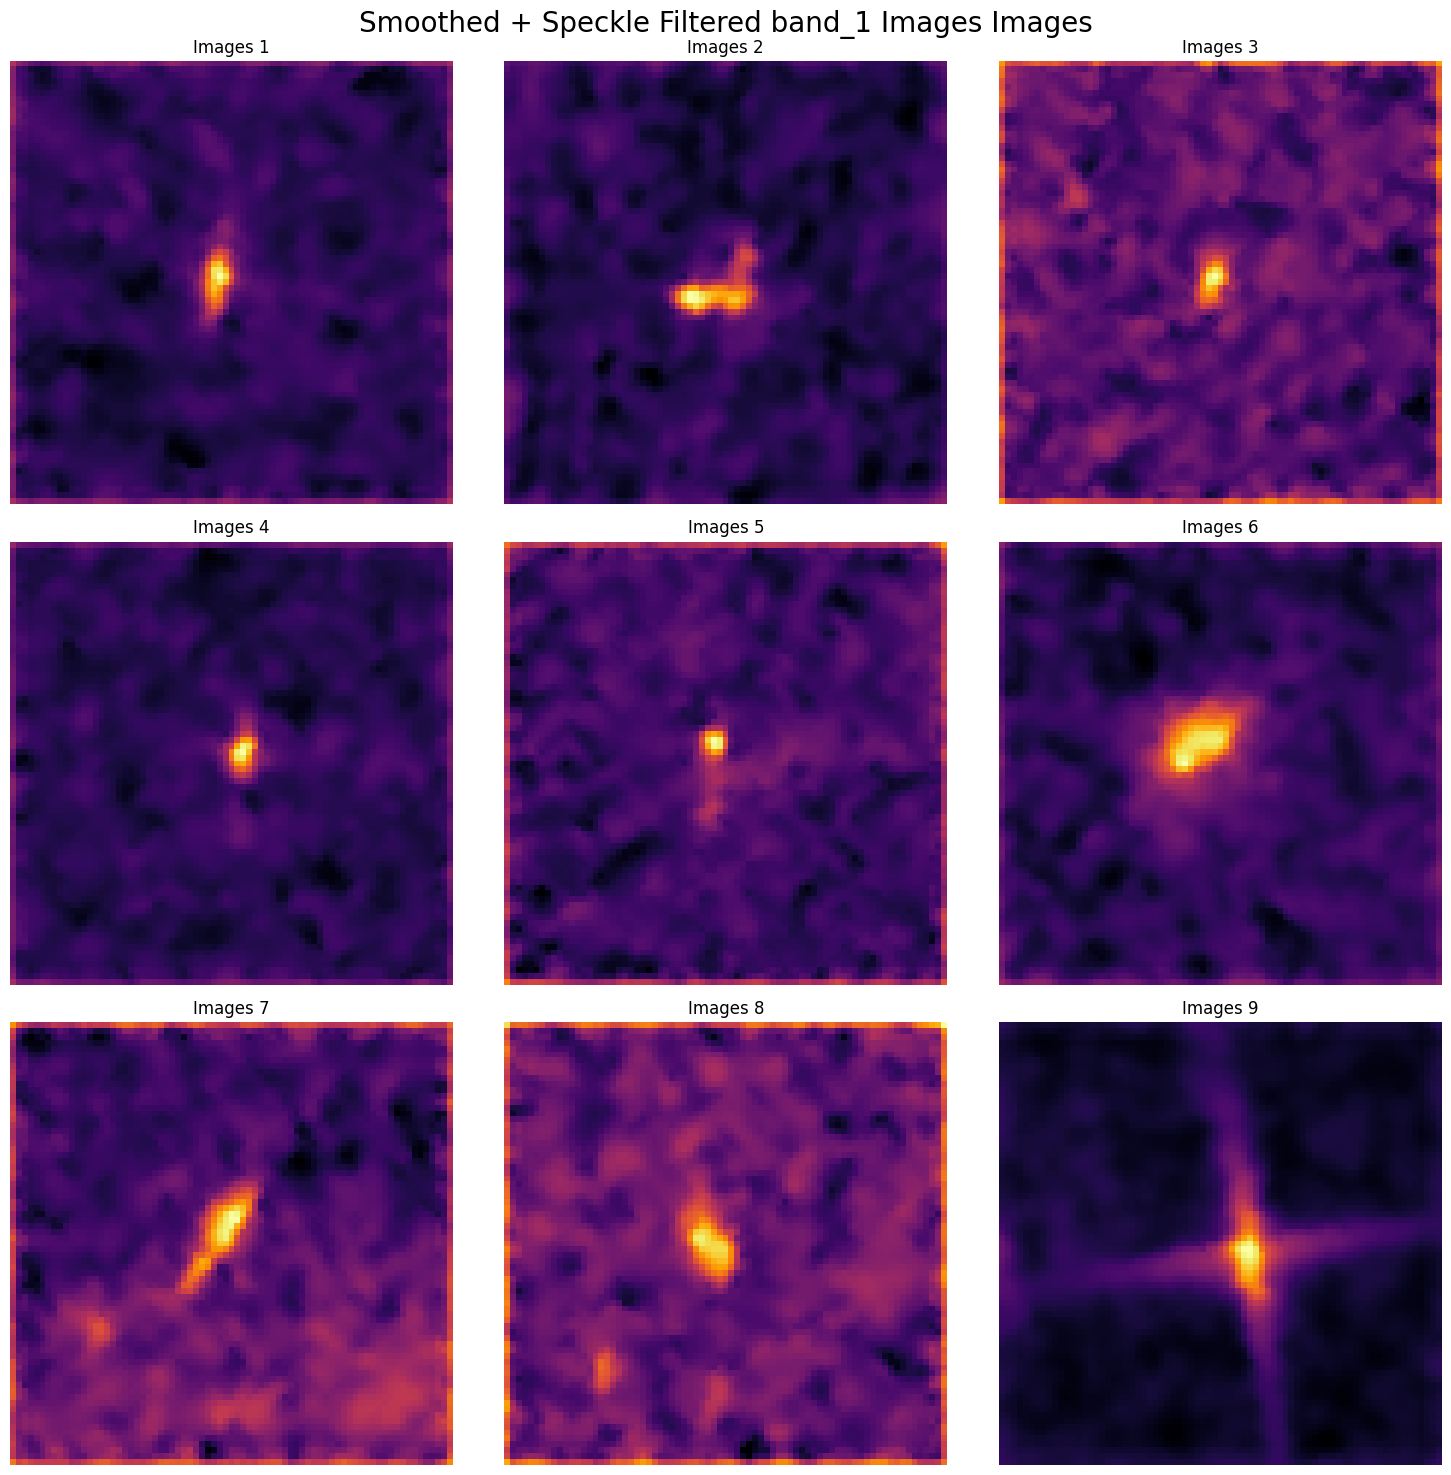

In [ ]:
# APPLY SPECKLE FILTERING TO IMAGES **NOT RUN YET**
def sf_band(band_array):
  smoothed = signal.convolve2d(band_array, smooth, mode = "same")
  return lee_filter(smoothed, size = 5)

# Make new column with smooth + sf arrays
df["band_1_ssf"] = df["band_1"].apply(sf_band)
df["band_2_ssf"] = df["band_2"].apply(sf_band)
df["hv_hh_ratio_ssf"] = df["band_2_ssf"] / (df["band_1_ssf"] + 1e-8)

# Check with plots
plot_smoothed_sf_images(df, "Images", "band_1")

In [ ]:
# getting a Smooth and Speckled filter training database
df.to_json("ssf_training.json", orient = "records", indent =4)

# Normalize HH, HV, HV/HH

In [ ]:
# NORMALIZE HH & HV
def normaize_img(img):
  min = np.min(img)
  max = np.max(img)
  return (img - min) / (max - min + 1e-8)

In [ ]:
df["band_1_norm"] = df["band_1_ssf"].apply(normalize_img)
df["band_2_norm"] = df["band_2_ssf"].apply(normalize_img)
df["hv_hh_ratio_norm"] = df["hv_hh_ratio_ssf"].apply(normalize_img)

NameError: name 'normalize_img' is not defined

# Filter with a Mask

Implementation of percentile-based masking to highlight the brightest pixels in each radar image, which are more likely to correspond to ships or iceberg surfaces while suppressing ocean background noise. The threshold is based on the 70th percentile of pixel intensity values, retaining pixels above this threshold and setting the rest to zero.

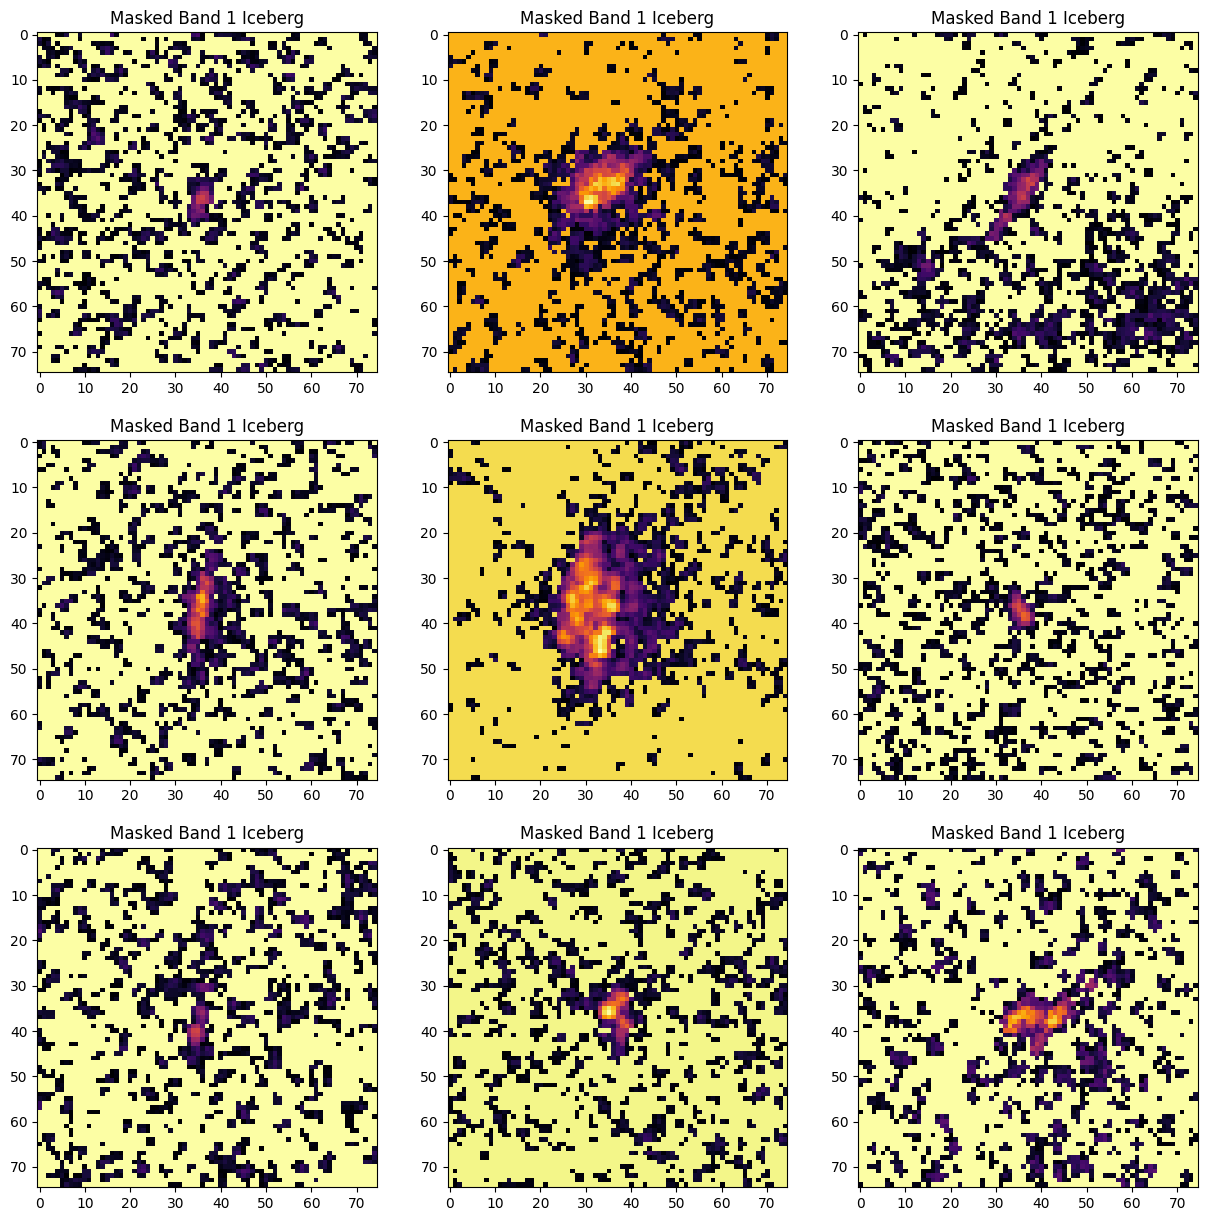

In [ ]:
# Function to apply percentile-based mask
def apply_percentile_mask(arr, percentile=70):
    threshold = np.percentile(arr, percentile)
    mask = arr > threshold
    return arr * mask, mask

# Apply to a few iceberg images for visualization
fig = plt.figure(figsize=(15, 15))
for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)
    arr = icebergs["band_1"].iloc[i]
    masked, mask = apply_percentile_mask(arr, percentile=70)
    ax.imshow(masked, cmap="inferno")
    ax.set_title("Masked Band 1 Iceberg")
plt.show()

Iceberg Example (Band 1)


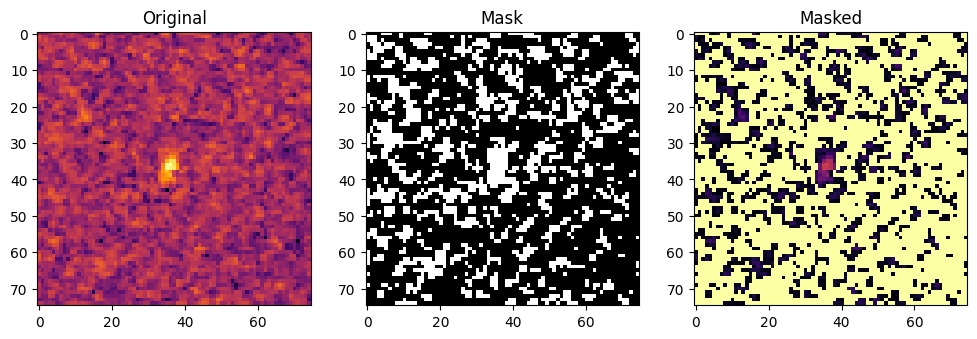

Ship Example (Band 1)


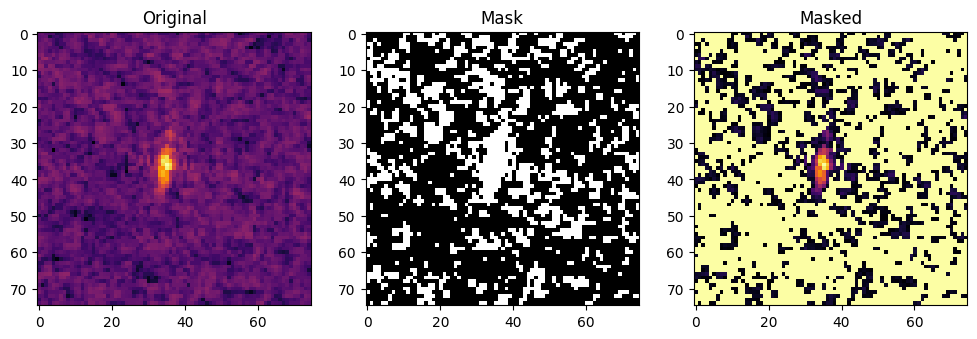

Iceberg Example (Band 2)


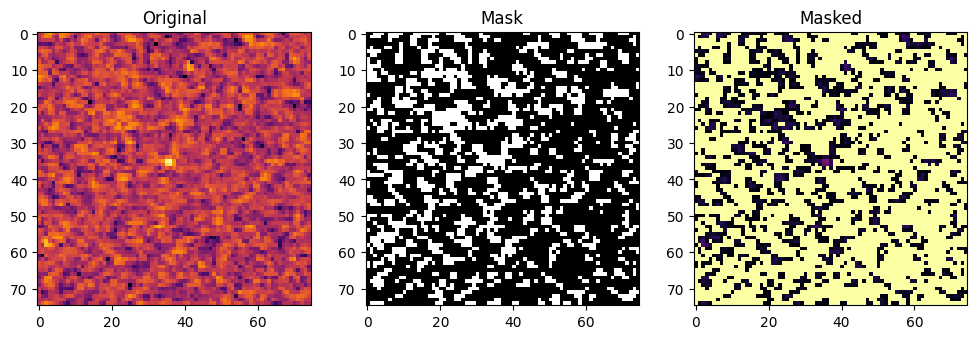

Ship Example (Band 2)


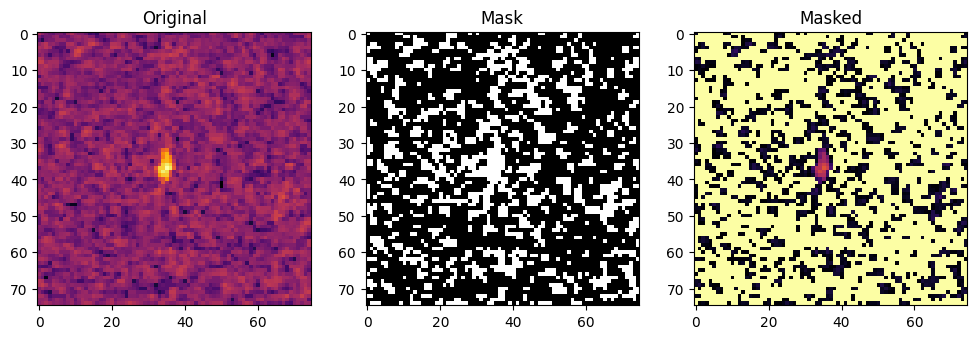

In [ ]:
# Function for visualization
def visualize_masking(arr, percentile=70):
    masked, mask = apply_percentile_mask(arr, percentile)

    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    axs[0].imshow(arr, cmap="inferno")
    axs[0].set_title("Original")

    axs[1].imshow(mask, cmap="gray")
    axs[1].set_title("Mask")

    axs[2].imshow(masked, cmap="inferno")
    axs[2].set_title("Masked")

    plt.show()

percentile = 70
    # Show example iceberg (band_1)
print("Iceberg Example (Band 1)")
visualize_masking(icebergs["band_1"].iloc[0], percentile=percentile)

# Show example ship (band_1)
print("Ship Example (Band 1)")
visualize_masking(ships["band_1"].iloc[0], percentile=percentile)

# Show example iceberg (band_2)
print("Iceberg Example (Band 2)")
visualize_masking(icebergs["band_2"].iloc[0], percentile=percentile)

# Show example ship (band_2)
print("Ship Example (Band 2)")
visualize_masking(ships["band_2"].iloc[0], percentile=percentile)

In [ ]:
#applying masked filter to all images
df["masked_band1"] = df["band_1"].apply(lambda x: apply_percentile_mask (x, percentile =70)[0])
df["masked_band2"] = df["band_2"].apply(lambda x: apply_percentile_mask(x, percentile =70)[0])

In [ ]:
df.drop("band_1_ssf",axis = 1, inplace = True)
df.drop("band_2_ssf", axis = 1, inplace = True)
df.drop("hv_hh_ratio_ssf", axis =1, inplace = True)
# getting a masked training database
df.to_json("masked_training.json", orient = "records", indent =4)

**Zooming into the images**

In [ ]:
pip install scikit-image

In [ ]:
#Making an Intensity Threshold centroid
from skimage import measure
def intensity_threshold (data):
  #initializing lists for the rows and columns with the right threshold
  all_rows = []
  all_cols = []
  all_weights =[]
  # going through all the examples in the dataset
  for img in data:
    threshold = np.mean(img) + 3*np.std(img)
    binary_mask = img > threshold

    #label connected bright regions
    labels = measure.label(binary_mask)
    regions = measure.regionprops(labels) # this gives properties for each label

    #get candidate centroids (row,column) which will be potential target point
    for r in regions:
      all_rows.append(r.centroid[0])
      all_cols.append(r.centroid[1])
      all_weights.append(r.area)

  #Finding the mean according to weight to use in remapping
  mean_row = int(np.average(all_rows, weights= all_weights))
  mean_col = int(np.average(all_cols, weights= all_weights) )
  mean_coords = (mean_row, mean_col)

  return mean_coords

In [ ]:
#For band 1 iceberg thresholds
iceberg1_threshold = intensity_threshold(icebergs["band_1"])
#For band 2 iceberg thresholds
iceberg2_threshold = intensity_threshold(icebergs["band_2"])
#For band 1 ship thresholds
ships1_threshold = intensity_threshold(ships["band_1"])
#For band 2 ship thresholds
ships2_threshold = intensity_threshold(ships["band_2"])

STEP 2: Extract a path around a detected bright spot

In [ ]:
#A function that extracts a square subimage from a larger image
def extract_patch(data, centroid):
  patch_size = 35 # testing to see if 20 would be good since we have 75 x 75 images
  row_center, col_center = centroid
  row_start, row_end  = row_center - patch_size//2 , row_center + patch_size//2
  col_start, col_end  = col_center - patch_size//2 , col_center + patch_size//2
  patch = data[row_start:row_end, col_start:col_end]
  return patch


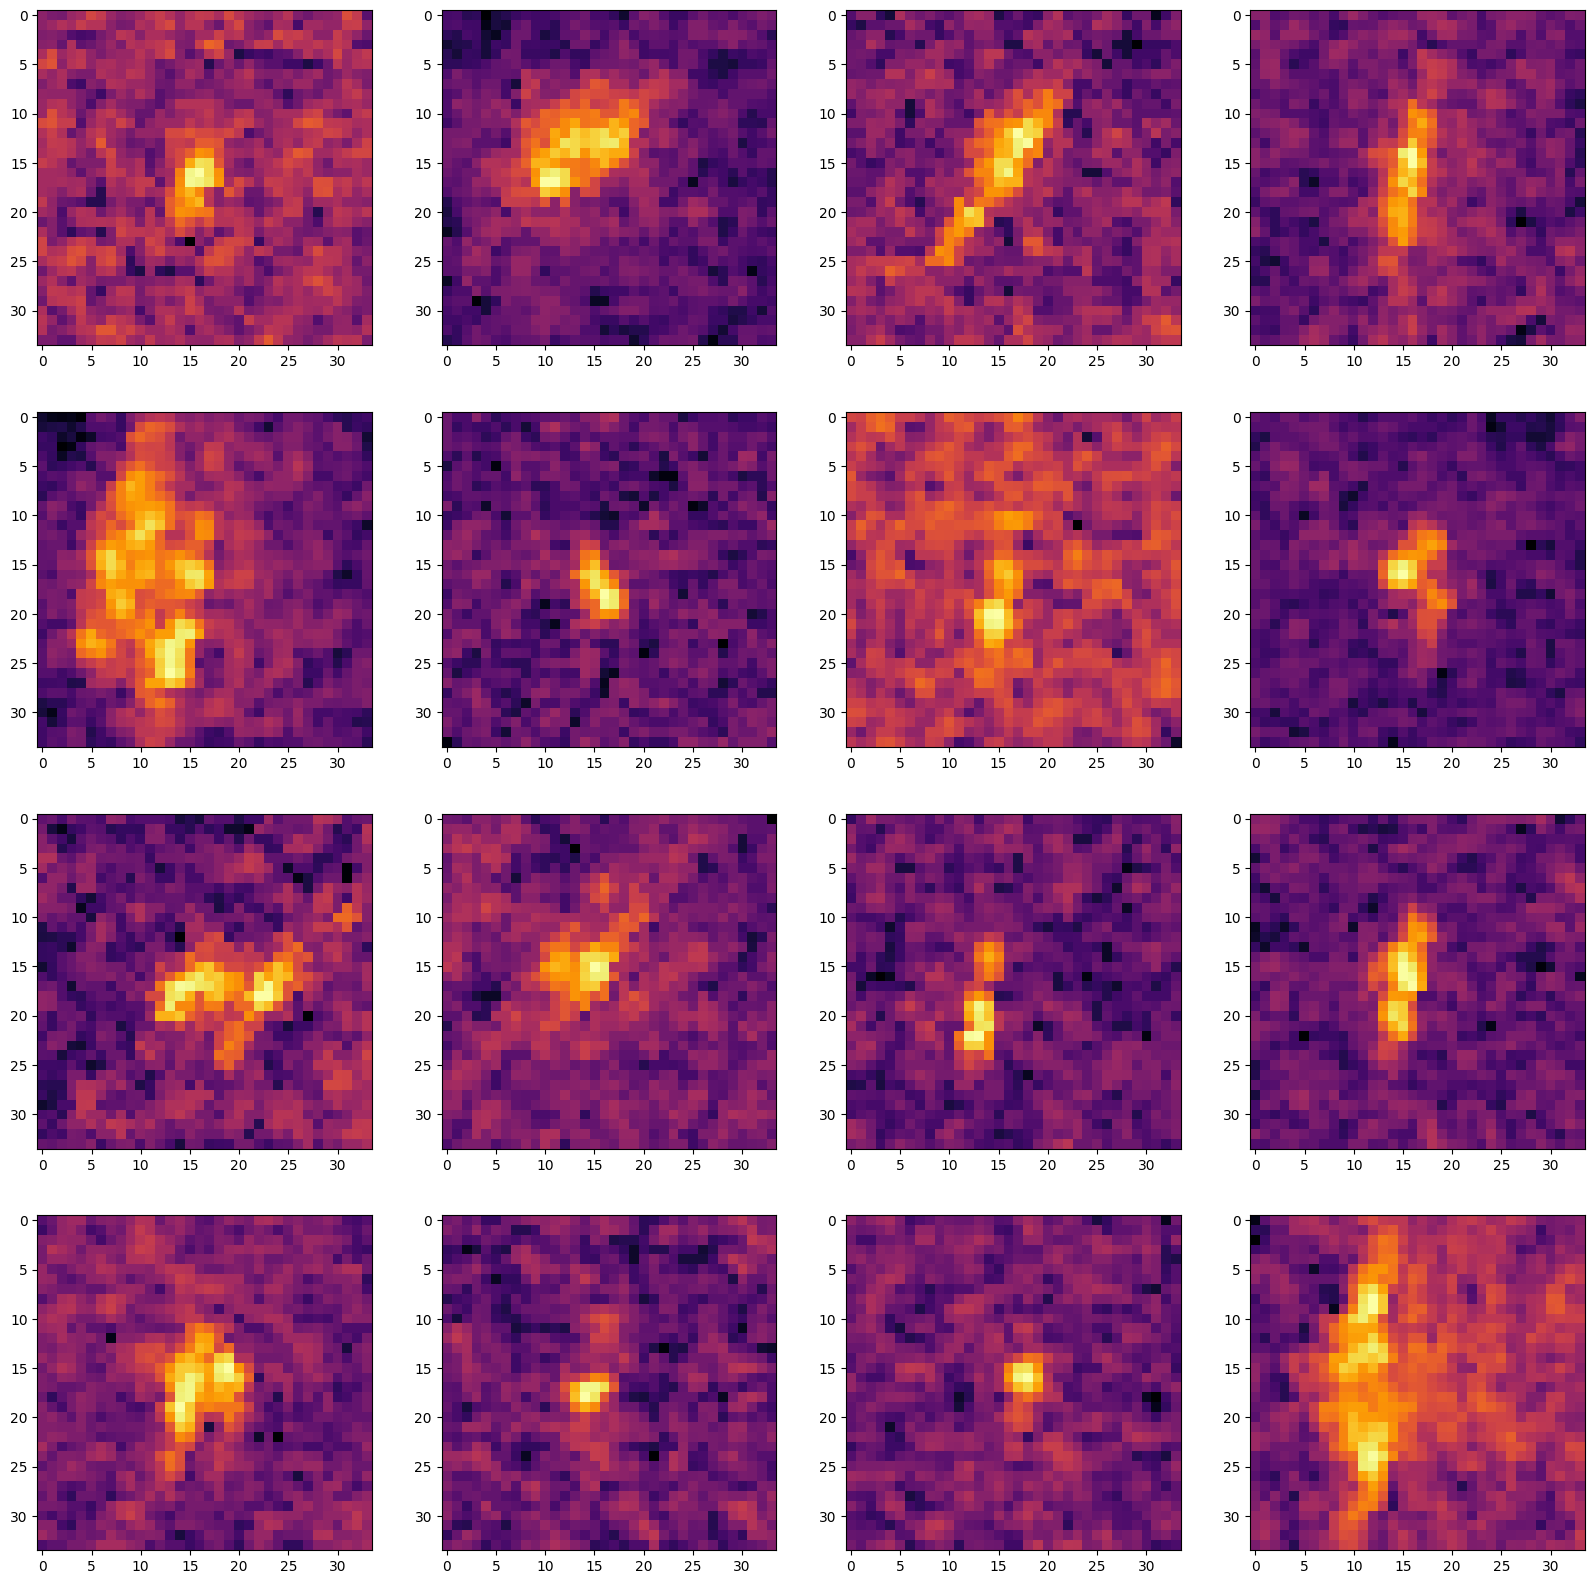

In [ ]:
#For icebergs of band 1
fig = plt.figure(1, figsize = (20,20))
for i in range (16):
  ax = fig.add_subplot (4,4, i+1)
  arr = extract_patch(icebergs["band_1"].iloc[i], iceberg1_threshold)
  ax.imshow(arr,cmap = "inferno")

plt.show()

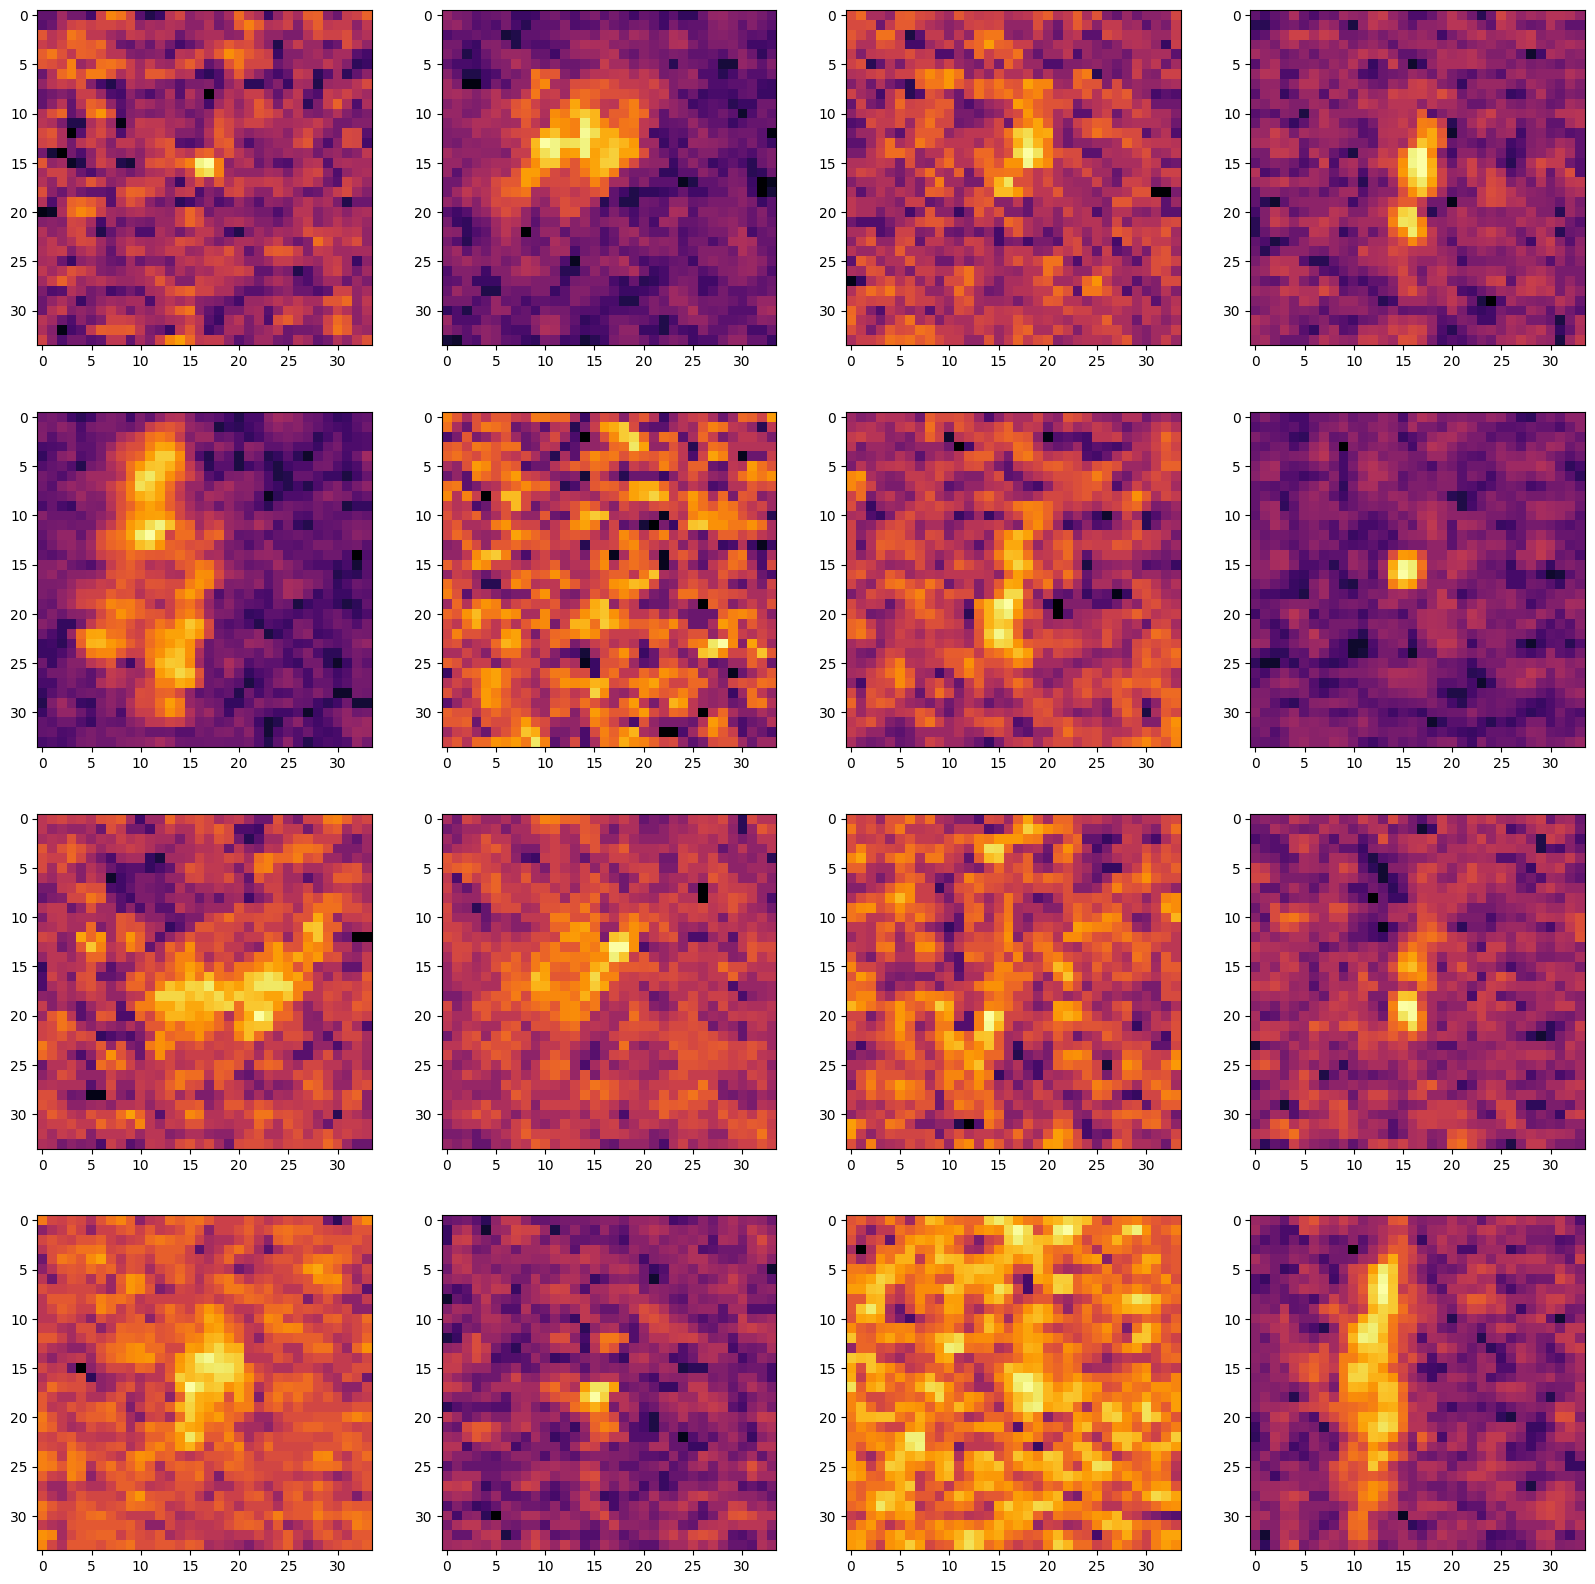

In [ ]:
#For icebergs of band 2
fig = plt.figure(1, figsize = (20,20))
for i in range (16):
  ax = fig.add_subplot (4,4, i+1)
  arr = extract_patch(icebergs["band_2"].iloc[i], iceberg2_threshold)
  ax.imshow(arr,cmap = "inferno")

plt.show()

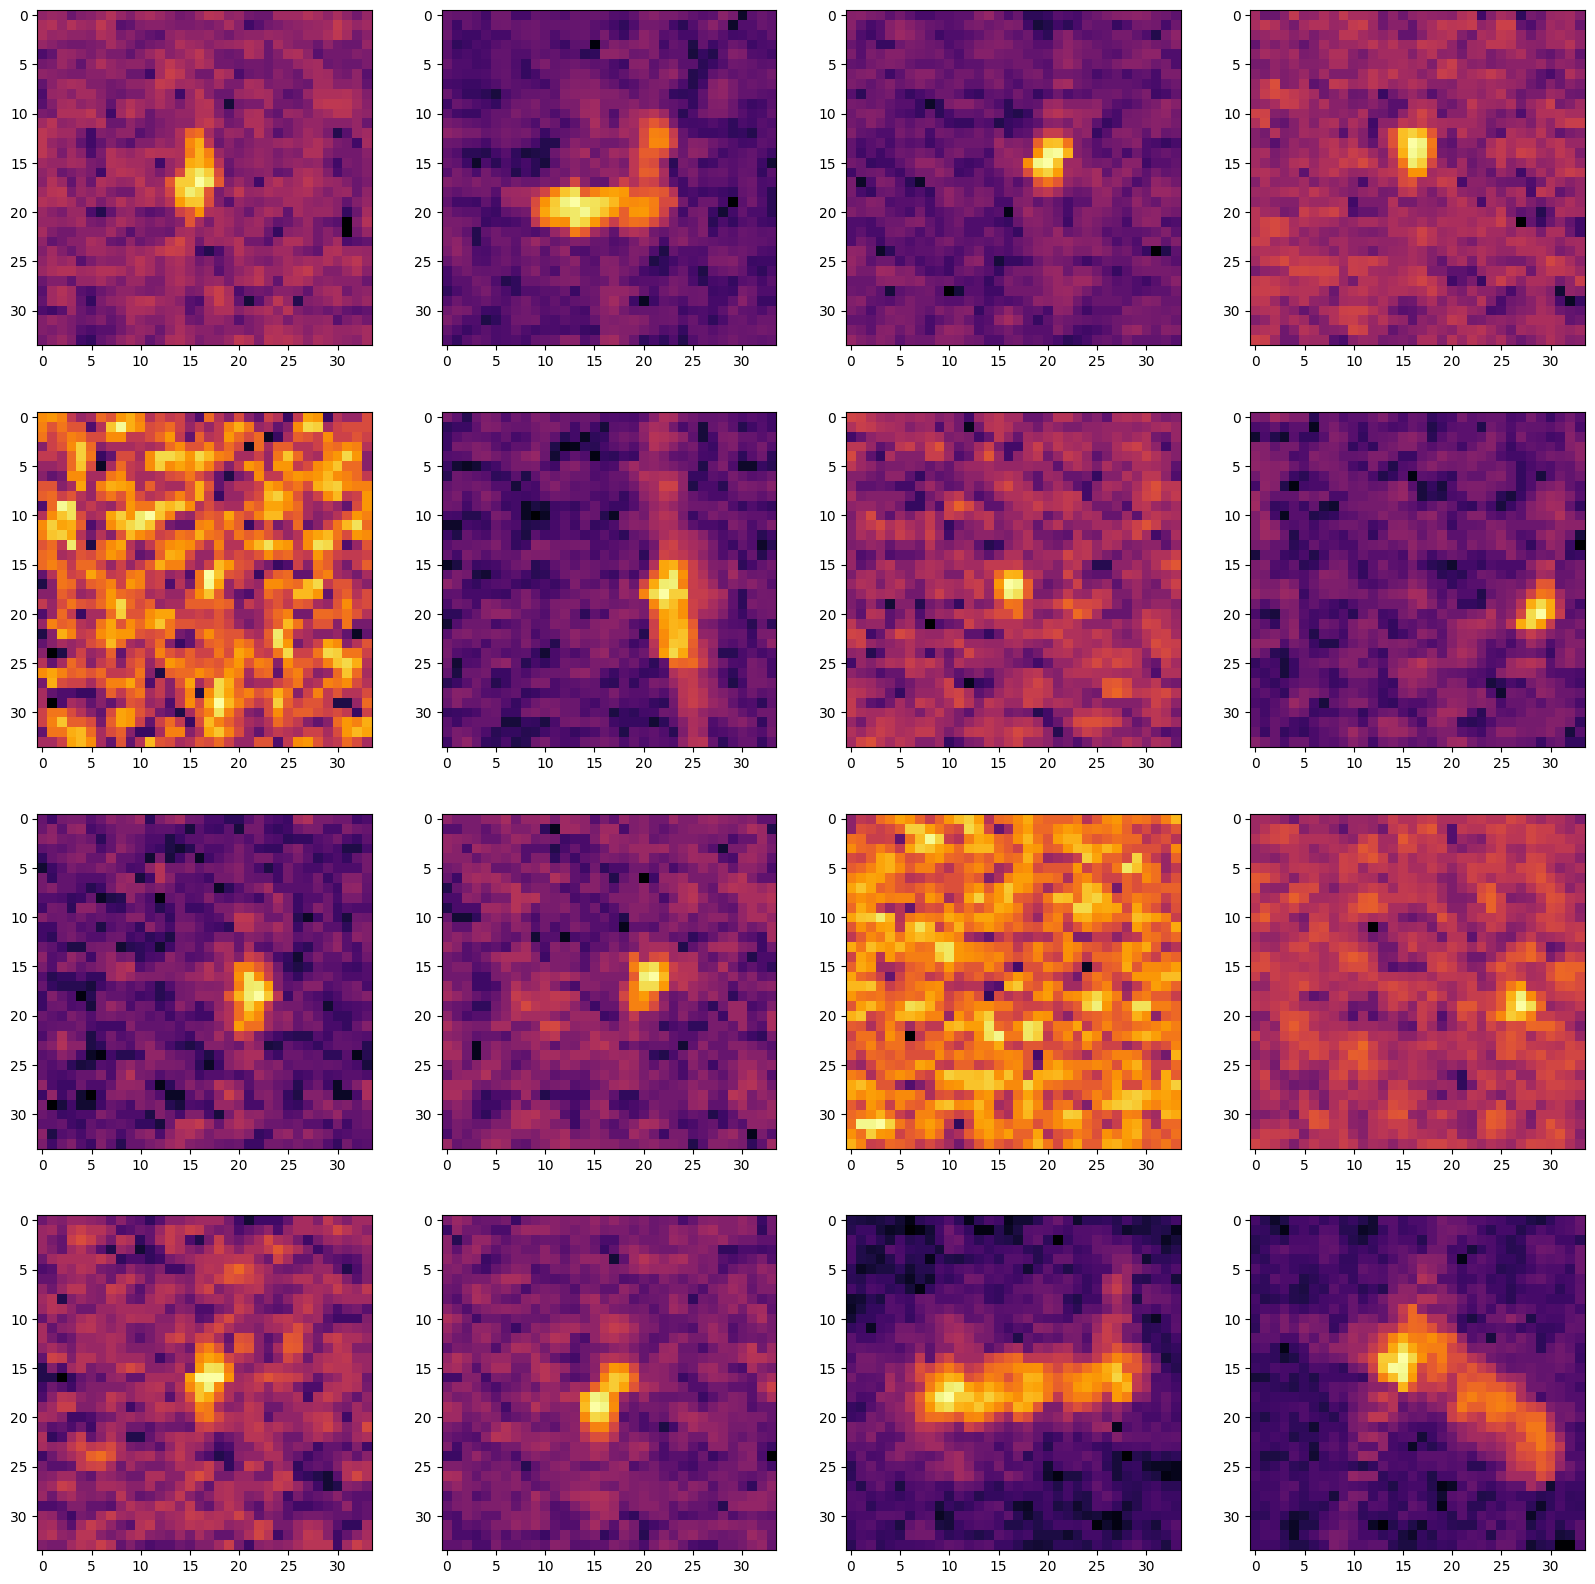

In [ ]:
#For ships of band 2
fig = plt.figure(1, figsize = (20,20))
for i in range (16):
  ax = fig.add_subplot (4,4, i+1)
  arr = extract_patch(ships["band_2"].iloc[i], ships2_threshold)
  ax.imshow(arr,cmap = "inferno")

plt.show()

Saving the zoomed in training data as a datafile

In [ ]:
#Rewriting the intensity threshold function to take in only an example and not like a list in order to apply it to the original databse
def intensity_threshold_centroid(img):
  #initializing lists for the rows and columns with the right threshold
  all_rows = []
  all_cols = []
  all_weights =[]
  # going through all the examples in the dataset
  threshold = np.mean(img) + 3*np.std(img)
  binary_mask = img > threshold

  #label connected bright regions
  labels = measure.label(binary_mask)
  regions = measure.regionprops(labels) # this gives properties for each label

  #get candidate centroids (row,column) which will be potential target point
  for r in regions:
    all_rows.append(r.centroid[0])
    all_cols.append(r.centroid[1])
    all_weights.append(r.area)

  #Finding the mean according to weight to use in remapping
  if len(all_rows) > 0:
    mean_row = int(np.average(all_rows, weights= all_weights))
    mean_col = int(np.average(all_cols, weights= all_weights) )
    mean_coords = (mean_row, mean_col)
  else:
    mean_coords = (0,0) # Return (0,0) or handle appropriately if no bright regions are found

  return mean_coords

In [ ]:
#To add centroid as a new column
df["band_1"]= df["band_1"].apply(lambda x: np.array(x).reshape(75,75))
df["band_2"] = df["band_2"].apply(lambda x: np.array(x).reshape(75,75))
#for icebergss in band1
df.loc[df["is_iceberg"]==1, "centroid_band1"] = df.loc[df["is_iceberg"]==1, "band_1"].apply(intensity_threshold_centroid)
#for icebergss in band2
df.loc[df["is_iceberg"] ==1, "centroid_band2"] = df.loc[df["is_iceberg"] == 1, "band_2"].apply(intensity_threshold_centroid)
#for ships in band1
df.loc[df["is_iceberg"]==0, "centroid_band1"] = df.loc[df["is_iceberg"]==0, "band_1"].apply(intensity_threshold_centroid)
#for ships in band2
df.loc[df["is_iceberg"] ==0, "centroid_band2"] = df.loc[df["is_iceberg"] == 0, "band_2"].apply(intensity_threshold_centroid)

In [ ]:
df["zoom_band1"] = df.apply(
    lambda row: extract_patch(row["band_1"], row["centroid_band1"]),
    axis=1
)
df["zoom_band2"] = df.apply(
    lambda row: extract_patch(row["band_2"], row["centroid_band2"]),
    axis=1
)
